### Wellcome to my Notebook !!

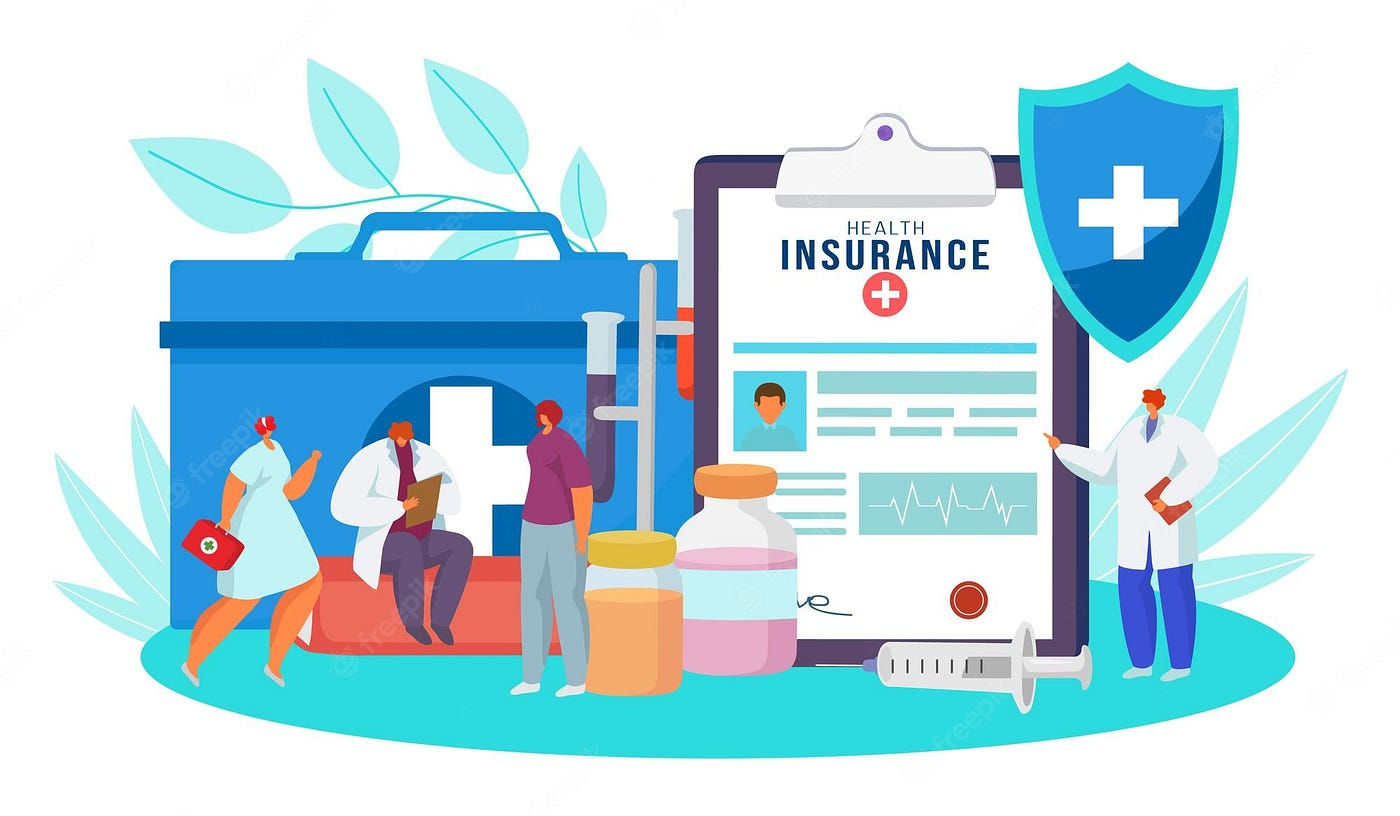

### The objective of this project is to predict Medical Charge! 💉🔮

### Import Relevant Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
train_df = pd.read_csv('insurance.csv')

### Basic Understanding of Data

In [3]:
train_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Description

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
train_df.shape

(1338, 7)

In [5]:
train_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
train_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
train_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
train_df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis and Featrue Engineering

In [10]:
data = train_df.copy()

In [11]:
data.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.dtypes 

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

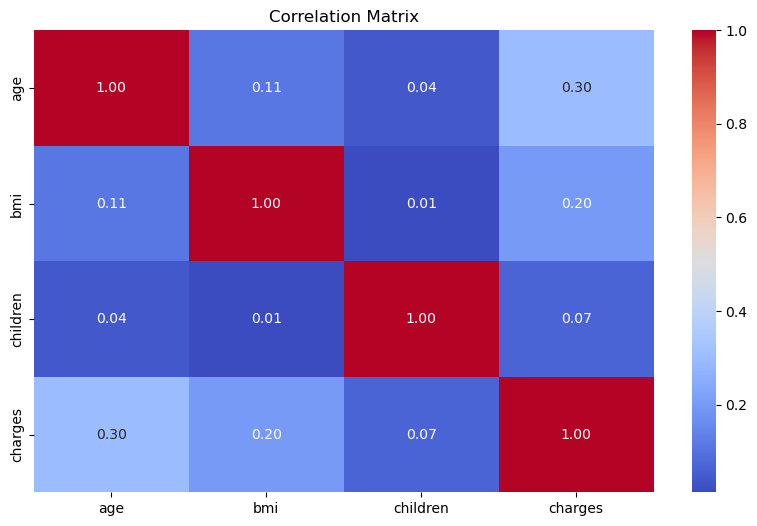

In [13]:
# Calculating the correlation matrix
correlation_matrix = data[['age', 'bmi', 'children', 'charges']].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

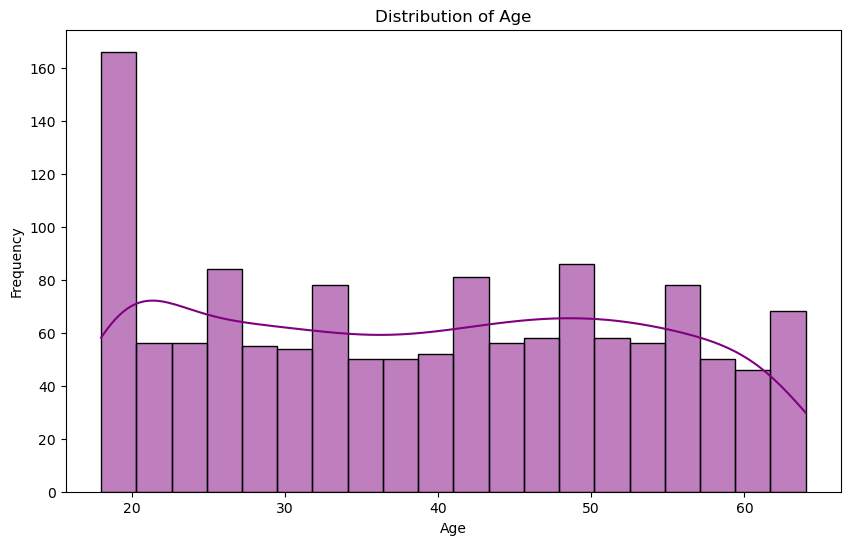

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='purple')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show() 

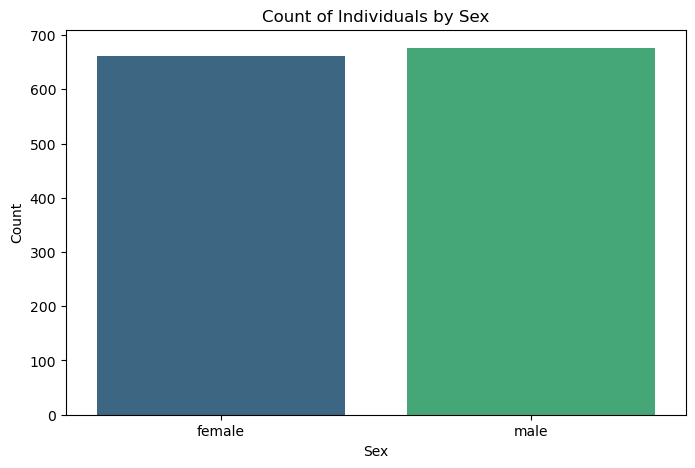

In [15]:
# Countplot of Sex
plt.figure(figsize=(8, 5))
sns.countplot(x='sex', data=data, palette='viridis')
plt.title('Count of Individuals by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show() 

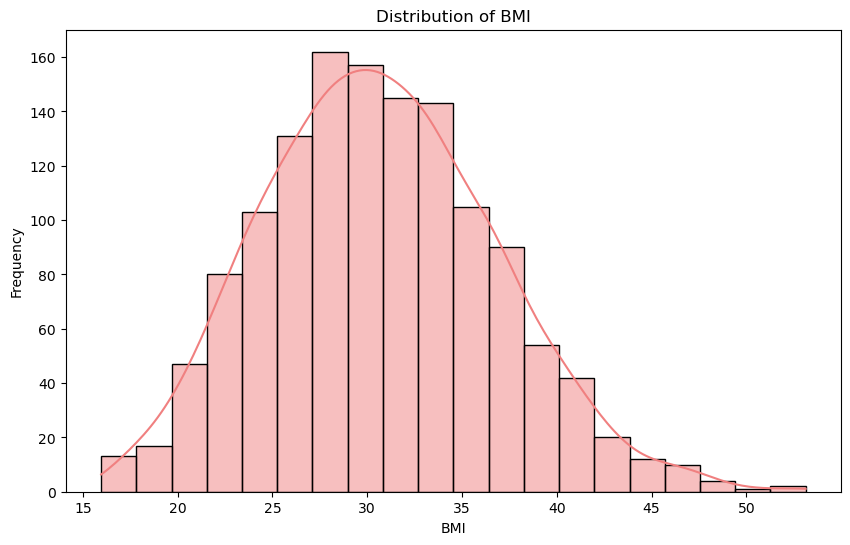

In [16]:
# Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

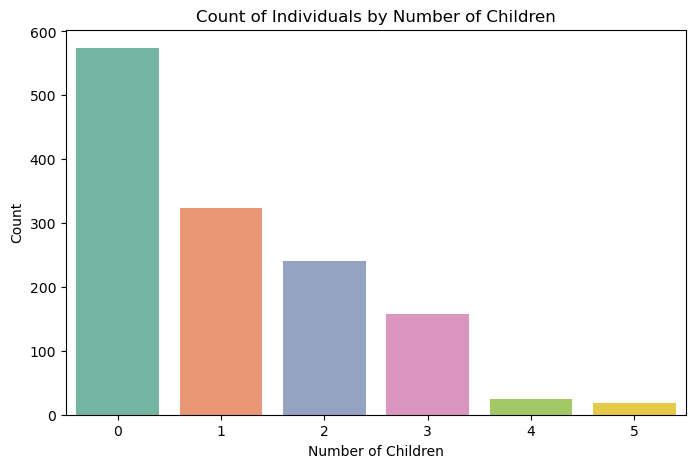

In [17]:
# Countplot of Children
plt.figure(figsize=(8, 5))
sns.countplot(x='children', data=data, palette='Set2')
plt.title('Count of Individuals by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()

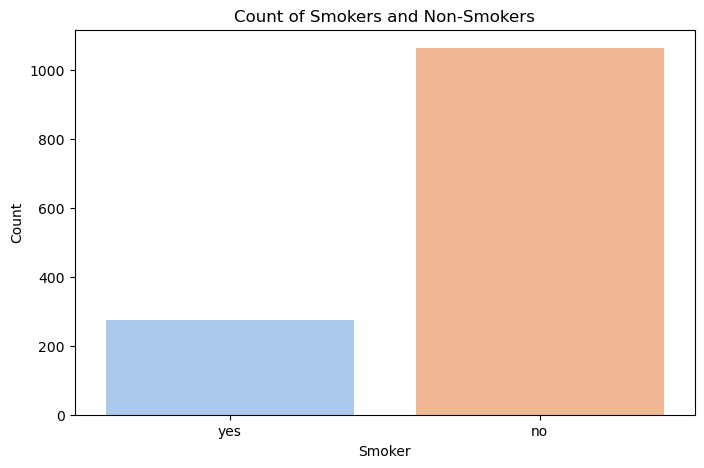

In [18]:
# Countplot of Smoker
plt.figure(figsize=(8, 5))
sns.countplot(x='smoker', data=data, palette='pastel')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

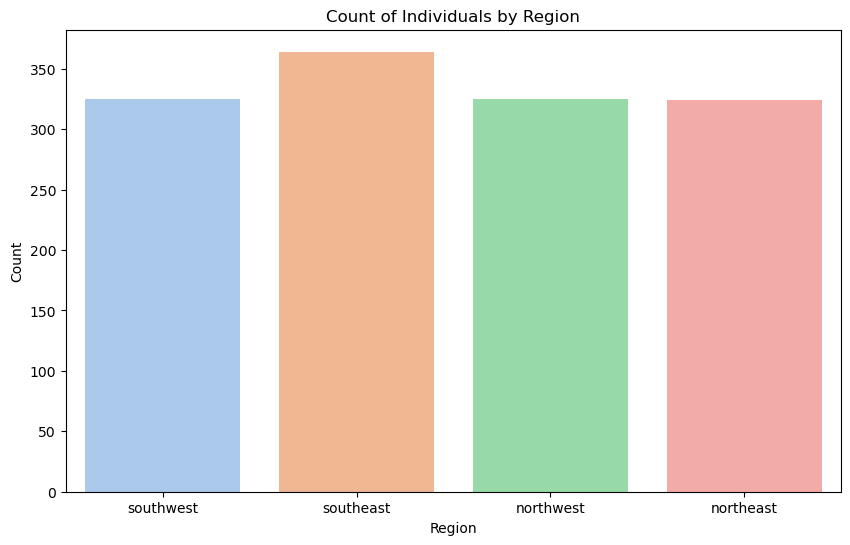

In [19]:
# Countplot of Region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=data, palette='pastel')
plt.title('Count of Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

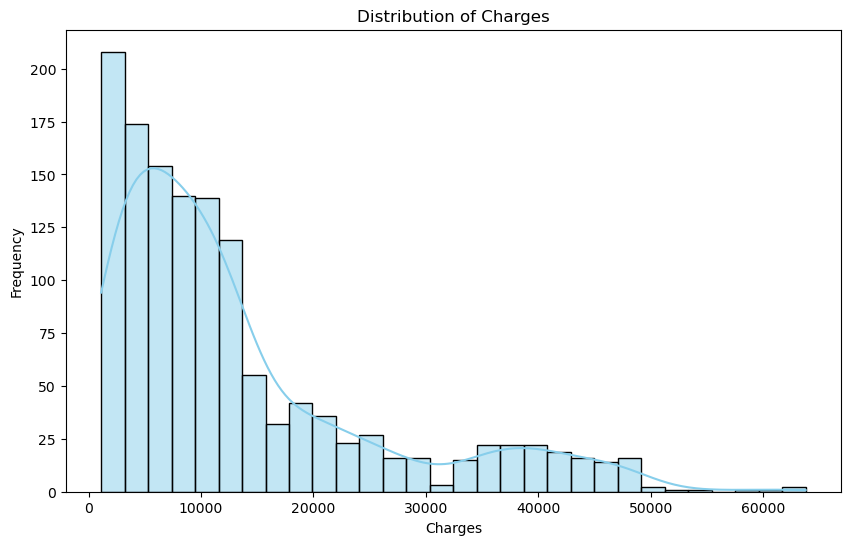

In [20]:
# Visualizing the distribution of charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

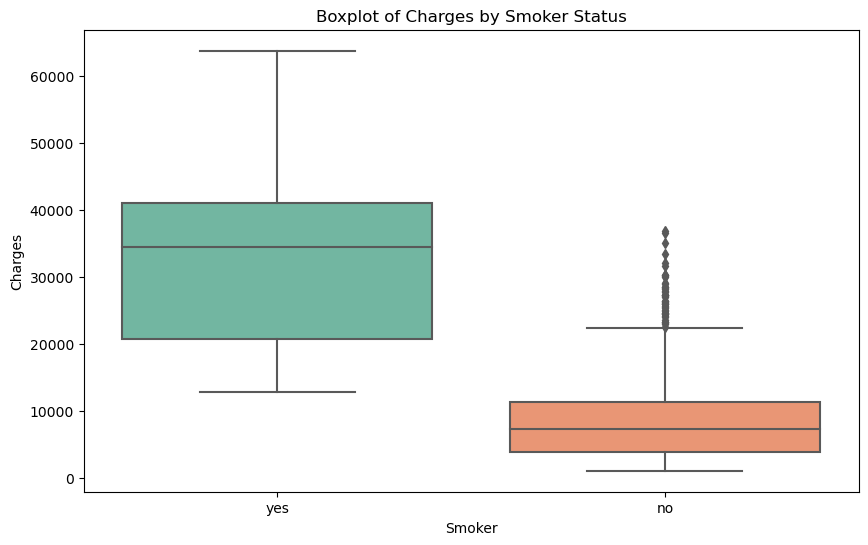

In [21]:
# Boxplot of charges grouped by smoker status
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data, palette='Set2')
plt.title('Boxplot of Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

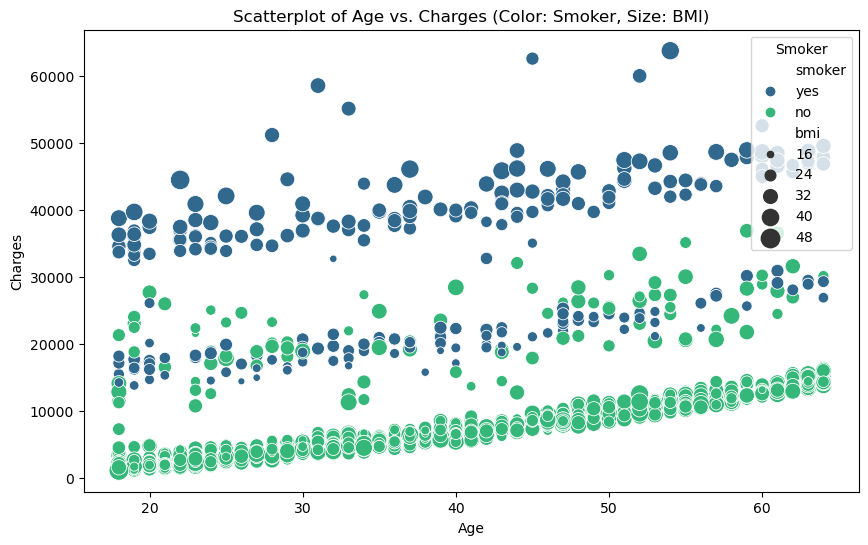

In [22]:
# Scatterplot of Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=data,  hue='smoker',palette='viridis', size='bmi', sizes=(20, 200))
plt.title('Scatterplot of Age vs. Charges (Color: Smoker, Size: BMI)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()

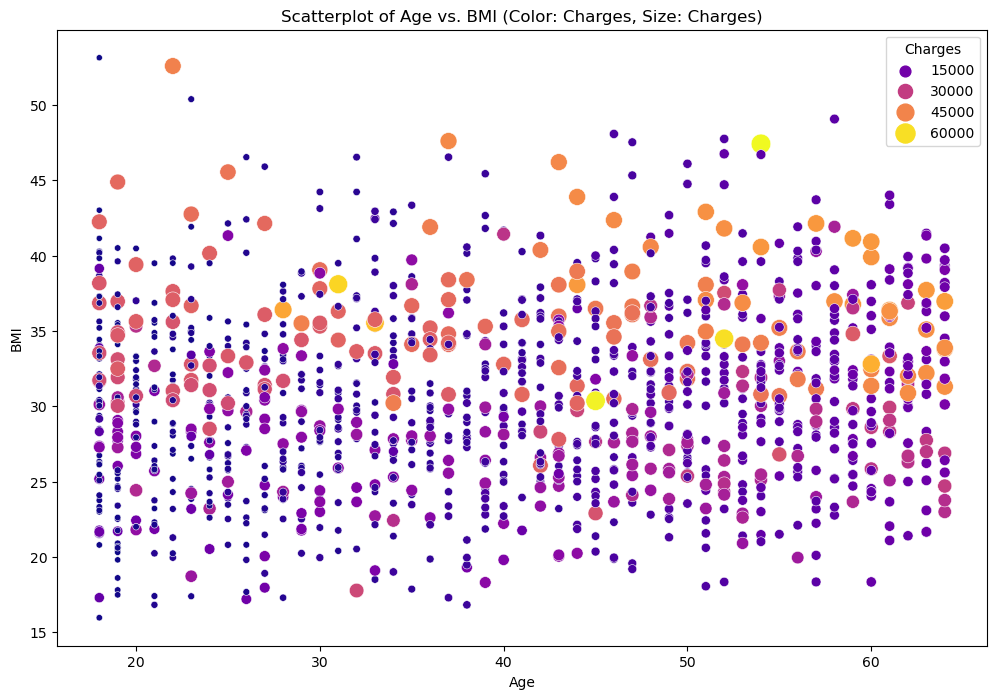

In [23]:
# Scatterplot of Age vs. BMI colored by Charges
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='age', y='bmi', data=data, hue='charges', palette='plasma', size='charges', sizes=(20, 200))
plt.title('Scatterplot of Age vs. BMI (Color: Charges, Size: Charges)')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Charges', loc='upper right')
plt.show()

In [24]:
# Create a new feature 'bmi_category' based on BMI values
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal Weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

data['bmi_category'] = data['bmi'].apply(categorize_bmi)

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


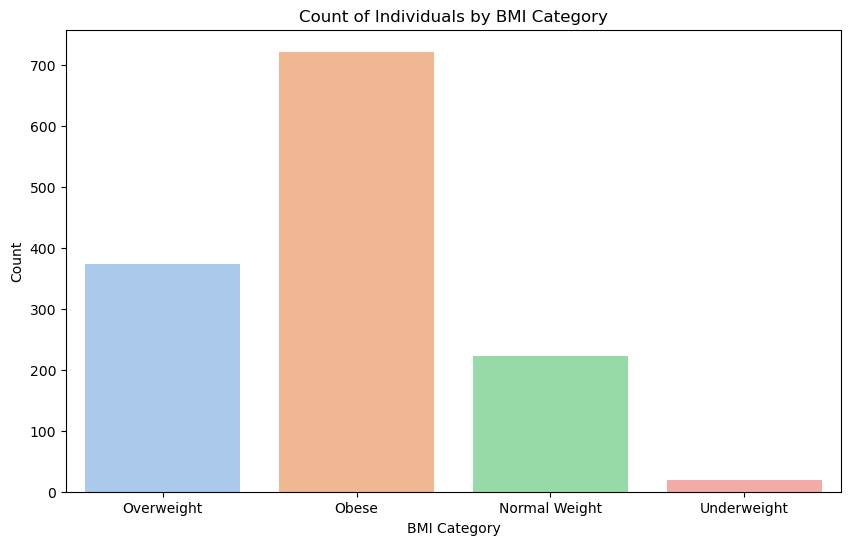

In [26]:
# Countplot of BMI Category
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_category', data=data, palette='pastel')
plt.title('Count of Individuals by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.show()

In [27]:
# Create a new feature 'family_size' by adding 1 to the number of children
data['family_size'] = data['children'] + 1

In [28]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,family_size
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1


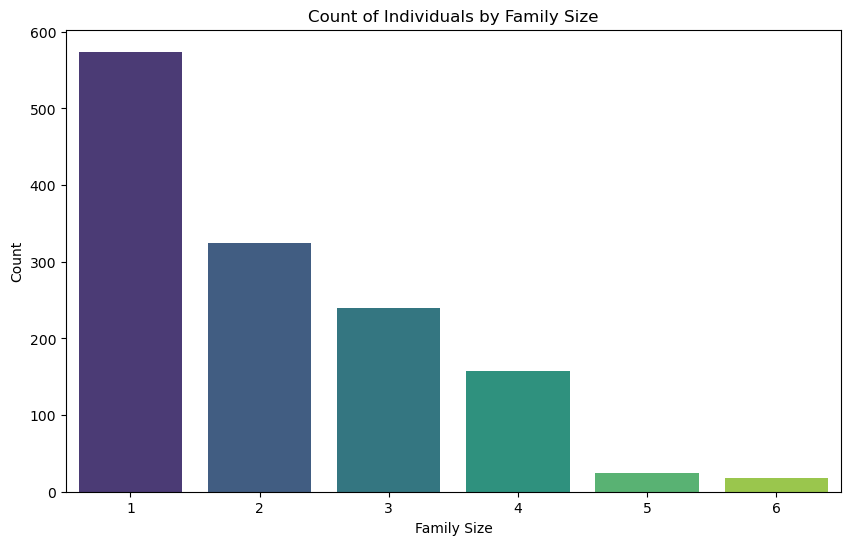

In [29]:
# Countplot of Family Size
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', data=data, palette='viridis')
plt.title('Count of Individuals by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [30]:
# Create a new feature 'smoker_region' by combining smoker and region information
data['smoker_region'] = data['smoker'] + '_' + data['region']

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,family_size,smoker_region
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,yes_southwest
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2,no_southeast
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4,no_southeast
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1,no_northwest
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1,no_northwest


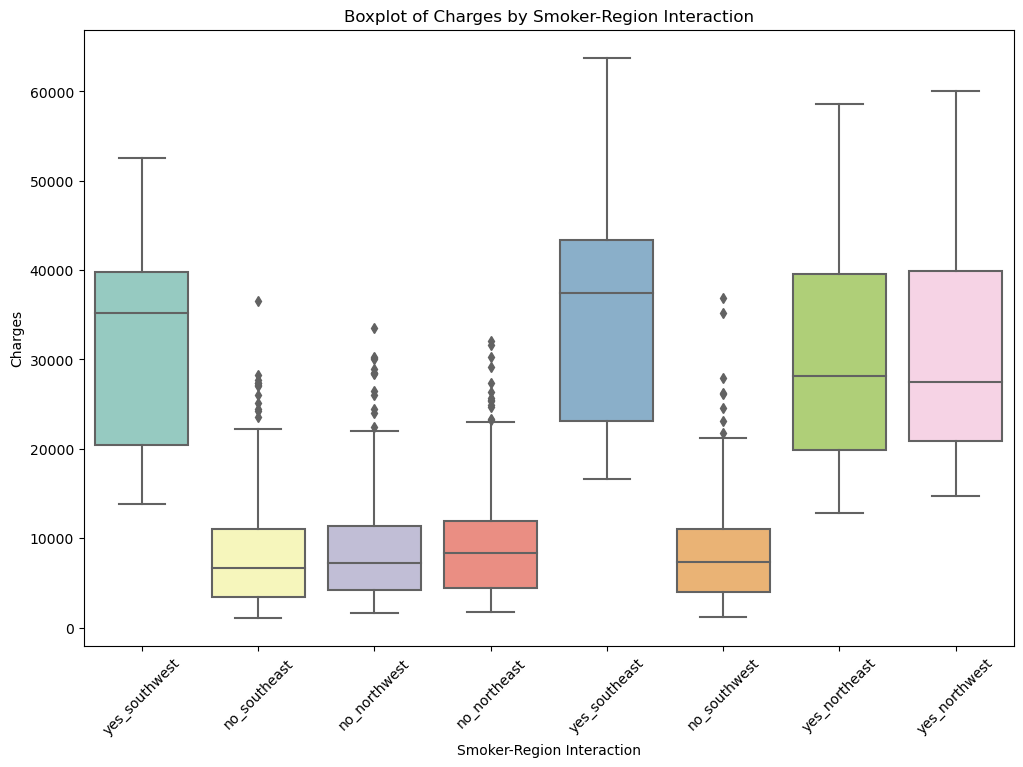

In [32]:
# Boxplot of Charges by Smoker-Region Interaction
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker_region', y='charges', data=data, palette='Set3')
plt.title('Boxplot of Charges by Smoker-Region Interaction')
plt.xlabel('Smoker-Region Interaction')
plt.ylabel('Charges')
plt.xticks(rotation=45)
plt.show()

In [33]:
data['age_group'] = pd.cut(data['age'], bins=[18, 30, 40, 50, 60, 70, 80], labels=['18-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

In [34]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,family_size,smoker_region,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,yes_southwest,18-30
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2,no_southeast,NaN
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4,no_southeast,18-30
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1,no_northwest,30-40
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1,no_northwest,30-40


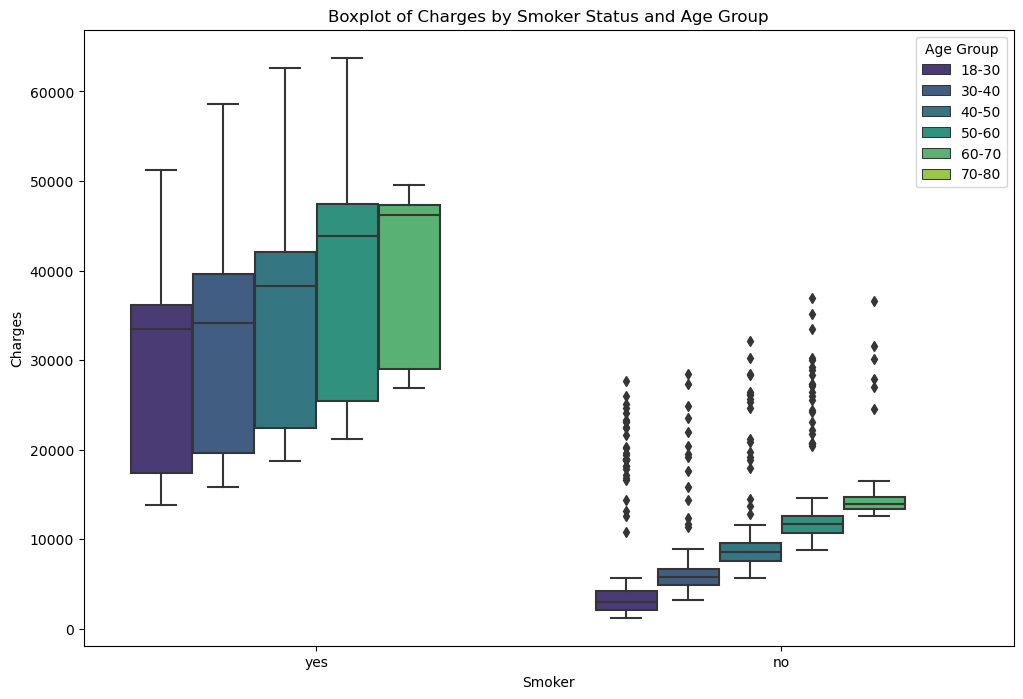

In [35]:
# Boxplot of Charges by Smoker Status and Age Group
plt.figure(figsize=(12, 8))
sns.boxplot(x='smoker', y='charges', hue='age_group', data=data, palette='viridis')
plt.title('Boxplot of Charges by Smoker Status and Age Group')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.legend(title='Age Group', loc='upper right')
plt.show()

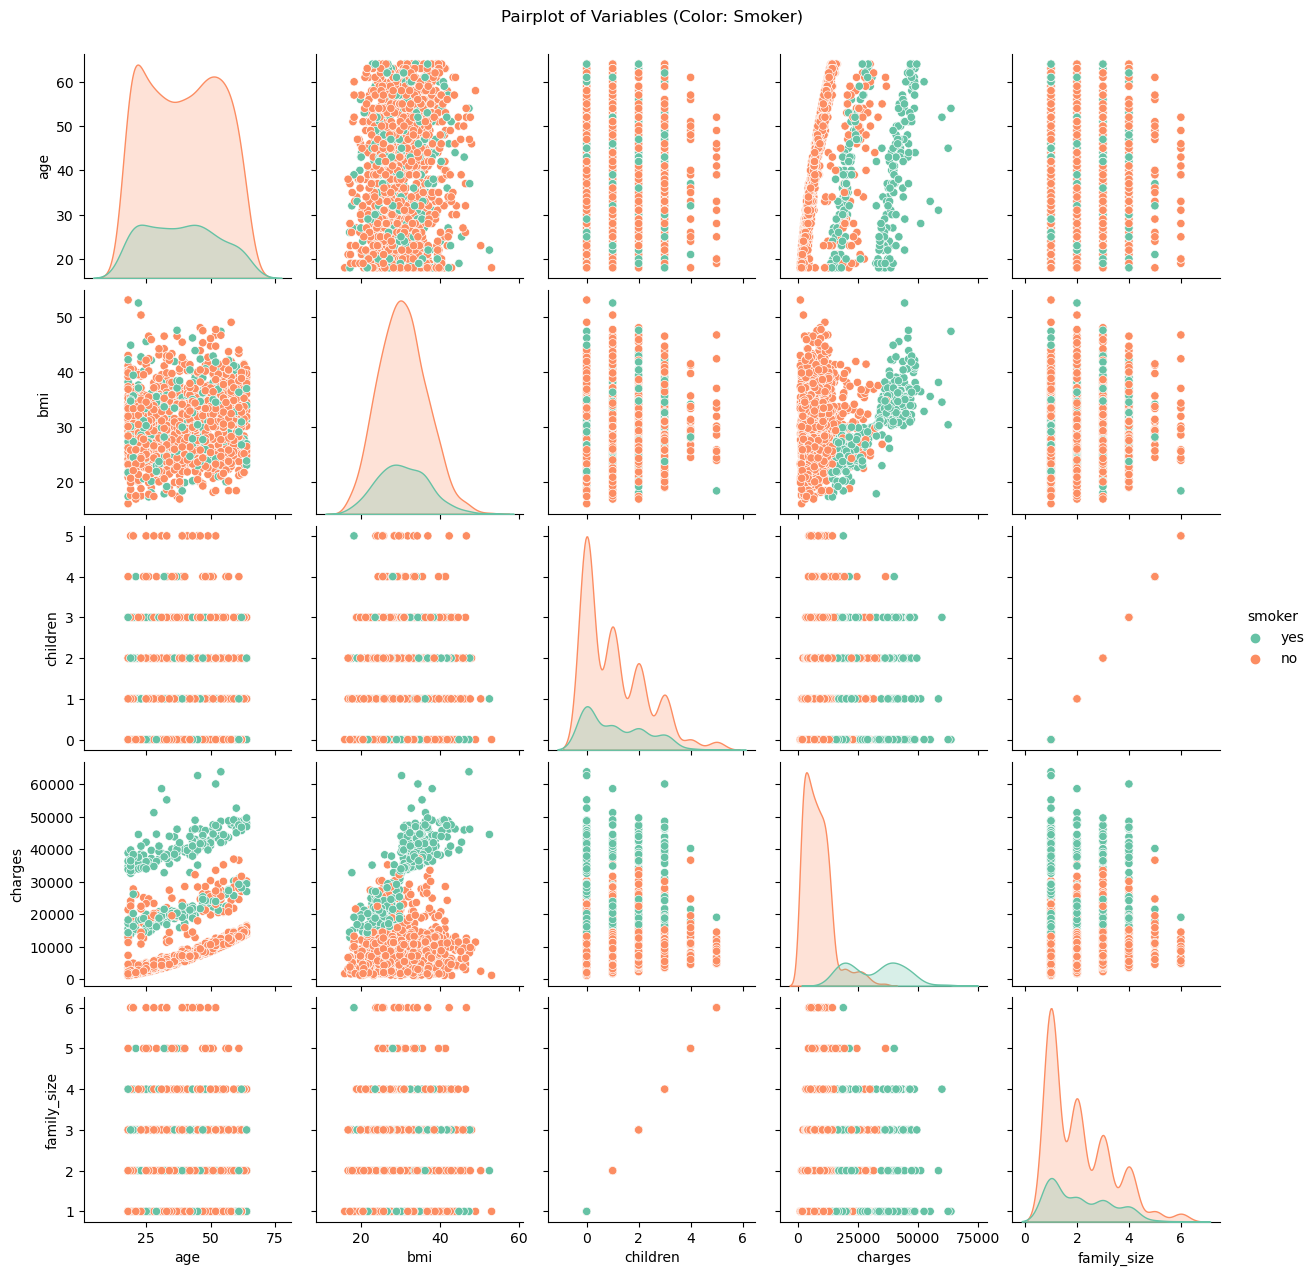

In [36]:
# Pairplot for multiple variable interactions
sns.pairplot(data, hue='smoker', palette='Set2')
plt.suptitle('Pairplot of Variables (Color: Smoker)', y=1.02)
plt.show()

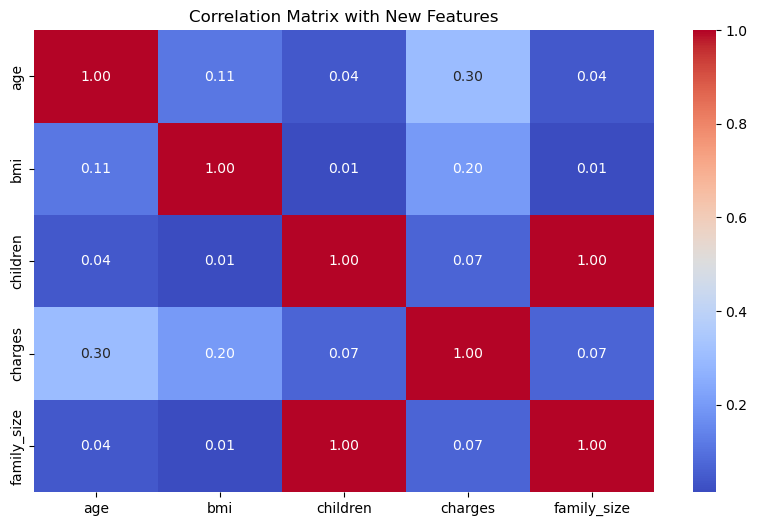

In [37]:
# Correlation matrix including new features
correlation_matrix_with_new_features = data[['age', 'bmi', 'children', 'charges', 'family_size']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_with_new_features, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with New Features')
plt.show()

### Data Cleaning or Preprocessing

In [38]:
# Checking Duplicates Data

In [39]:
data.duplicated().sum()

1

In [40]:
data.drop_duplicates(inplace=True)

In [41]:
data.duplicated().sum()

0

In [42]:
# Checking Cardinality of Categorical features

In [43]:
data.select_dtypes(include='object').nunique()

sex              2
smoker           2
region           4
bmi_category     4
smoker_region    8
dtype: int64

### Lets Deal With Missing Value

In [44]:
data.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
bmi_category      0
family_size       0
smoker_region     0
age_group        69
dtype: int64

In [45]:
# Checking Total Number & Percentage of Missing Values in Training Dataset

In [46]:
df = (data.isnull().sum()[data.isnull().sum() > 0]).to_frame().rename(columns= {0:'Number of Missing Values'})
df['% of Missing Values'] = round(100 * data.isnull().sum()[data.isnull().sum()>0] / len(data), 2)

In [47]:
df

,Number of Missing Values,% of Missing Values
age_group,69,5.16


In [48]:
# Visualizing Missing Numbers

In [49]:
import missingno as msno

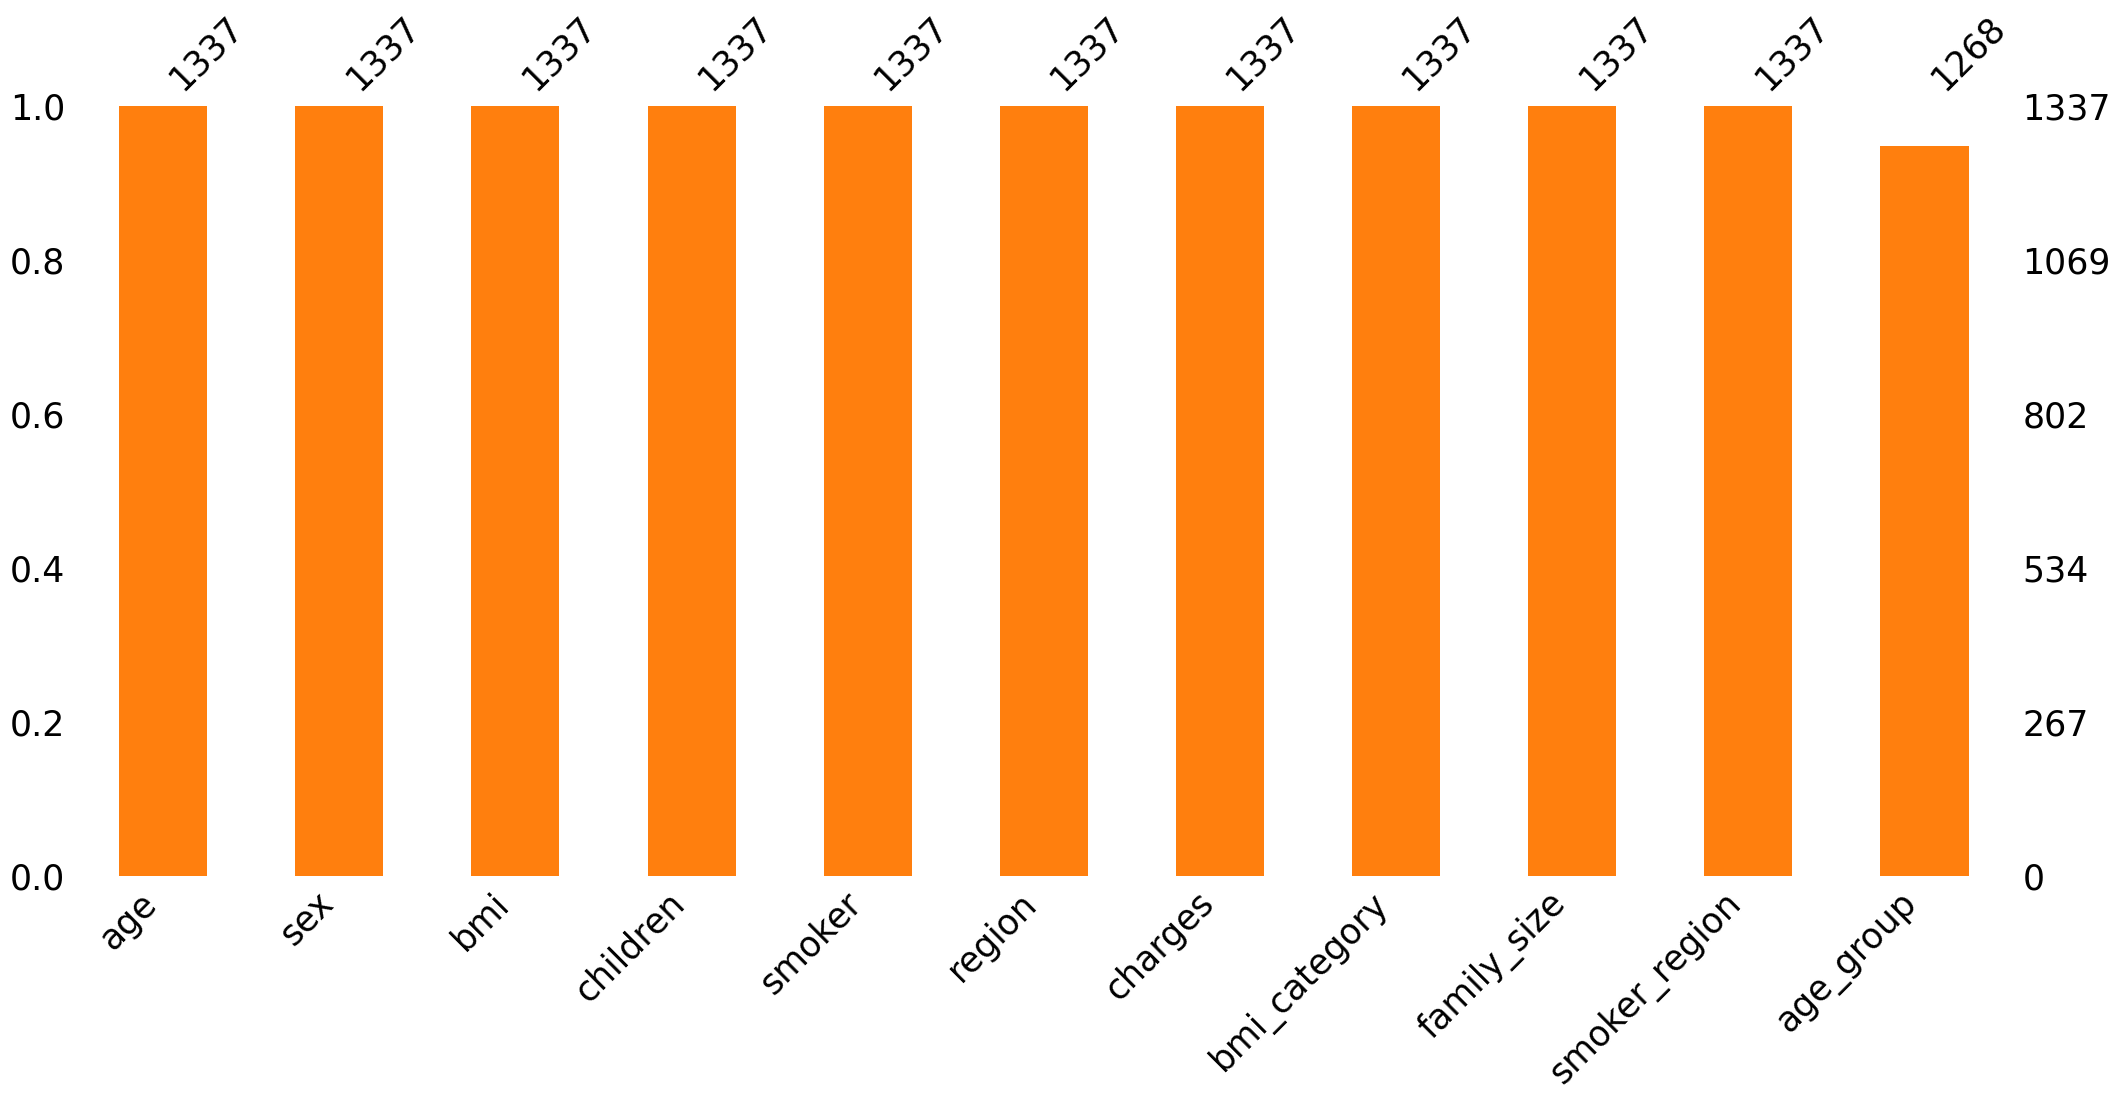

In [50]:
msno.bar(data, color='C1', fontsize=25)
plt.show()

In [51]:
# Another way for Visualizing Missing Numbers

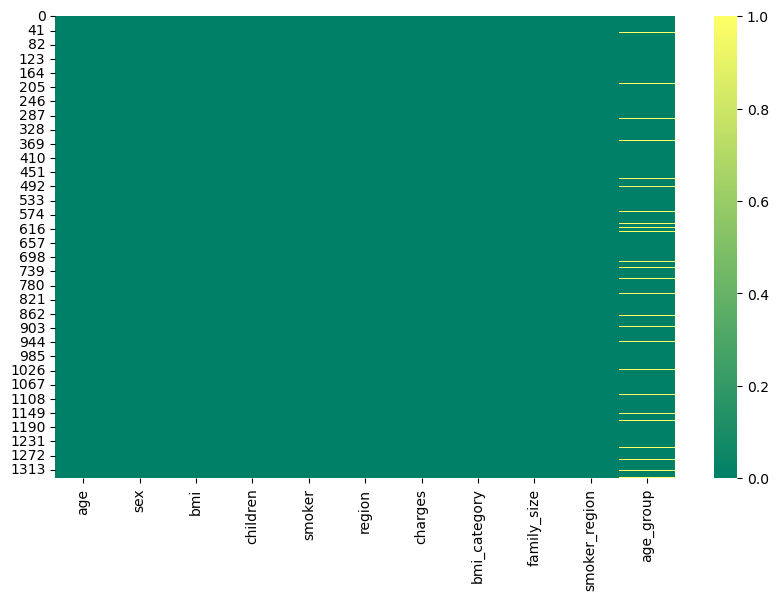

In [52]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='summer')
plt.show()

In [53]:
# Handling Missing Values.

In [54]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype == 'category']
num_cols = [col for col in data.columns if data[col].dtype != 'object' and data[col].dtype != 'category']

In [55]:
cat_cols

['sex', 'smoker', 'region', 'bmi_category', 'smoker_region', 'age_group']

In [56]:
num_cols

['age', 'bmi', 'children', 'charges', 'family_size']

In [57]:
from sklearn.impute import SimpleImputer

In [58]:
imputer = SimpleImputer(strategy="most_frequent")

In [59]:
def fill_missing_no(df):
    df[cat_cols] = imputer.fit_transform(df[cat_cols]) 

In [60]:
fill_missing_no(data)

In [61]:
data.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
bmi_category     0
family_size      0
smoker_region    0
age_group        0
dtype: int64

### Feature Encoding

In [62]:
cat_cols

['sex', 'smoker', 'region', 'bmi_category', 'smoker_region', 'age_group']

In [63]:
num_cols

['age', 'bmi', 'children', 'charges', 'family_size']

In [64]:
data.dtypes

age                int64
sex               object
bmi              float64
children           int64
smoker            object
region            object
charges          float64
bmi_category      object
family_size        int64
smoker_region     object
age_group         object
dtype: object

In [65]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,family_size,smoker_region,age_group
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,1,yes_southwest,18-30
1,18,male,33.770,1,no,southeast,1725.55230,Obese,2,no_southeast,18-30
2,28,male,33.000,3,no,southeast,4449.46200,Obese,4,no_southeast,18-30
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,1,no_northwest,30-40
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,1,no_northwest,30-40


In [66]:
data['sex'].nunique() # Label Encoding

2

In [67]:
data['smoker'].nunique() # Label Encoding

2

In [68]:
data['region'].nunique() # Label Encoding

4

In [69]:
data['bmi_category'].nunique() # Label Encoding

4

In [70]:
data['smoker_region'].nunique() # Label Encoding

8

In [71]:
data['age_group'].nunique() # Label Encoding

5

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
le = LabelEncoder()
for col in ['sex', 'smoker', 'region', 'bmi_category', 'smoker_region', 'age_group']:  # Label Encoding
    data[col] = le.fit_transform(data[col]) 

In [74]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category,family_size,smoker_region,age_group
0,19,0,27.900,0,1,3,16884.92400,2,1,7,0
1,18,1,33.770,1,0,2,1725.55230,1,2,2,0
2,28,1,33.000,3,0,2,4449.46200,1,4,2,0
3,33,1,22.705,0,0,1,21984.47061,0,1,1,1
4,32,1,28.880,0,0,1,3866.85520,2,1,1,1


In [75]:
data.dtypes

age                int64
sex                int32
bmi              float64
children           int64
smoker             int32
region             int32
charges          float64
bmi_category       int32
family_size        int64
smoker_region      int32
age_group          int32
dtype: object

### Lets Perform outlier detection !

In [76]:
def plot(df, col):
    # Create a larger figure
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

    # Plot the distribution with kde
    sns.distplot(df[col], ax=ax1, color='b')
    ax1.set_title(f'Distribution of {col}')

    # Boxplot with custom whiskers
    sns.boxplot(df[col], ax=ax2, whis=1.5, color='g')
    ax2.set_title(f'Boxplot of {col}')

    # Distribution without kde (histogram)
    sns.histplot(df[col], ax=ax3, kde=False, bins=30, color='y')
    ax3.set_title(f'Histogram of {col}')

    # Apply log transformation if needed
    if (df[col] > 0).all():  # Check if all values are positive to avoid issues with log transformation
        ax1.set_yscale('log')
        ax3.set_yscale('log')

    plt.tight_layout()
    plt.show()

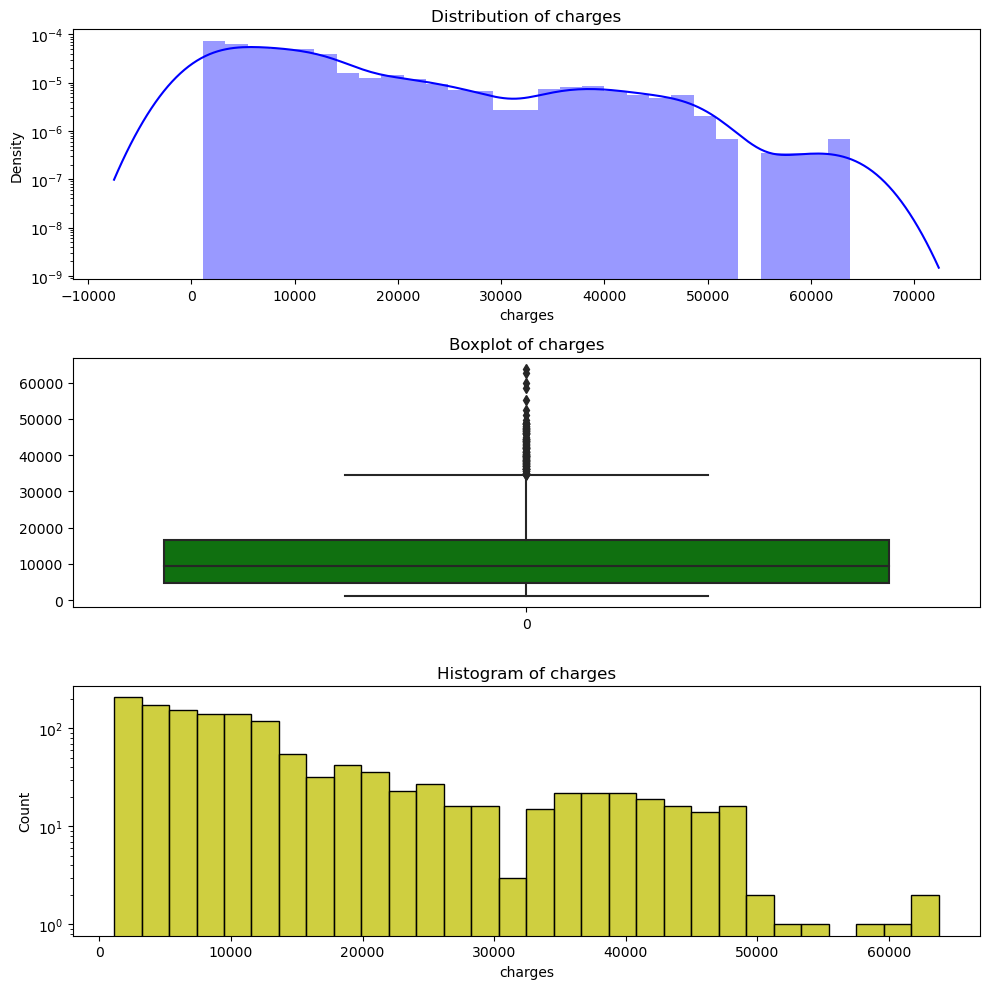

In [77]:
plot(data, 'charges')

In [78]:
q1 = data['charges'].quantile(0.25)
q3 = data['charges'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [79]:
maximum

34524.777625

In [80]:
minimum

-13120.716174999998

In [81]:
[x for x in data['charges'] if x> maximum or x<minimum] 

[39611.7577,
 36837.467,
 37701.8768,
 38711.0,
 35585.576,
 51194.55914,
 39774.2763,
 48173.361,
 38709.176,
 37742.5757,
 47496.49445,
 37165.1638,
 39836.519,
 43578.9394,
 47291.055,
 47055.5321,
 39556.4945,
 40720.55105,
 36950.2567,
 36149.4835,
 48824.45,
 43753.33705,
 37133.8982,
 34779.615,
 38511.6283,
 35160.13457,
 47305.305,
 44260.7499,
 41097.16175,
 43921.1837,
 36219.40545,
 46151.1245,
 42856.838,
 48549.17835,
 47896.79135,
 42112.2356,
 38746.3551,
 42124.5153,
 34838.873,
 35491.64,
 42760.5022,
 47928.03,
 48517.56315,
 41919.097,
 36085.219,
 38126.2465,
 42303.69215,
 46889.2612,
 46599.1084,
 39125.33225,
 37079.372,
 35147.52848,
 48885.13561,
 36197.699,
 38245.59327,
 48675.5177,
 63770.42801,
 45863.205,
 39983.42595,
 45702.02235,
 58571.07448,
 43943.8761,
 39241.442,
 42969.8527,
 40182.246,
 34617.84065,
 42983.4585,
 42560.4304,
 40003.33225,
 45710.20785,
 46200.9851,
 46130.5265,
 40103.89,
 34806.4677,
 40273.6455,
 44400.4064,
 40932.4295,
 4041

In [82]:
len([x for x in data['charges'] if x> maximum or x<minimum])

139

### How to deal with Outlier

In [83]:
### wherever I have price >40K just replace replace it with median of Price
data['charges'] = np.where(data['charges']>=40000 , data['charges'].median() , data['charges'])

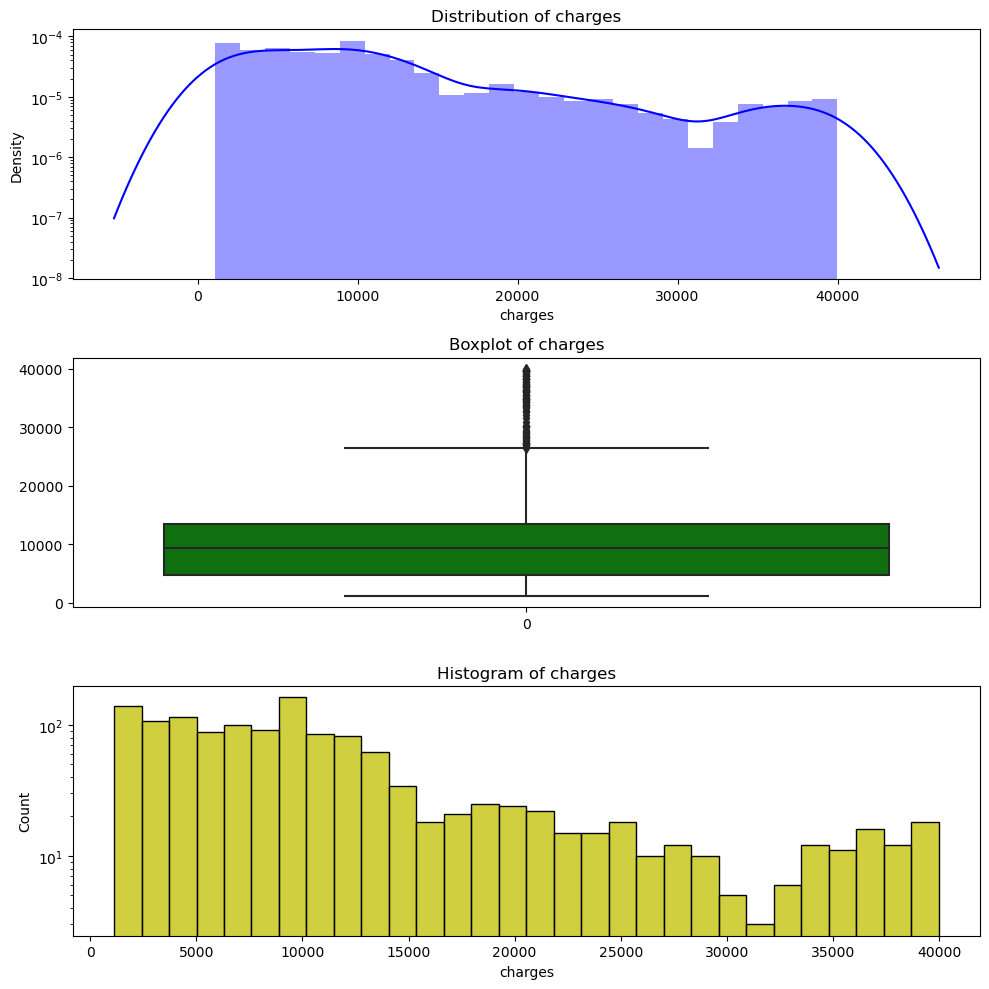

In [84]:
plot(data, 'charges')

### Lets Perform feature selection

In [85]:
X = data.drop(['charges'] , axis=1)

In [86]:
y = data['charges']

In [87]:
from sklearn.feature_selection import mutual_info_regression

In [88]:
imp = mutual_info_regression(X, y)

In [89]:
imp

array([1.44116171, 0.18595962, 0.0624713 , 0.15314297, 0.36632844,
       0.0819631 , 0.07184992, 0.15332818, 0.43730489, 0.86047374])

In [90]:
imp_df = pd.DataFrame(imp, index=X.columns) 

In [91]:
imp_df

,0
age,1.441162
sex,0.185960
bmi,0.062471
children,0.153143
smoker,0.366328
region,0.081963
bmi_category,0.071850
family_size,0.153328
smoker_region,0.437305
age_group,0.860474


In [92]:
imp_df.columns = ['importance']

In [93]:
imp_df

,importance
age,1.441162
sex,0.185960
bmi,0.062471
children,0.153143
smoker,0.366328
region,0.081963
bmi_category,0.071850
family_size,0.153328
smoker_region,0.437305
age_group,0.860474


In [94]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
age,1.441162
age_group,0.860474
smoker_region,0.437305
smoker,0.366328
sex,0.185960
family_size,0.153328
children,0.153143
region,0.081963
bmi_category,0.071850
bmi,0.062471


In [95]:
data.dtypes

age                int64
sex                int32
bmi              float64
children           int64
smoker             int32
region             int32
charges          float64
bmi_category       int32
family_size        int64
smoker_region      int32
age_group          int32
dtype: object

### Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [97]:
X_scaled

array([[-1.44041773, -1.00977099, -0.45315959, ..., -0.90923416,
         2.3866619 , -1.12902743],
       [-1.51164747,  0.99032355,  0.50942165, ..., -0.07944162,
        -0.17184272, -1.12902743],
       [-0.79935006,  0.99032355,  0.3831546 , ...,  1.58014347,
        -0.17184272, -1.12902743],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, ..., -0.90923416,
        -0.17184272, -1.12902743],
       [-1.29795825, -1.00977099, -0.79752426, ..., -0.90923416,
         0.33985821, -1.12902743],
       [ 1.55123139, -1.00977099, -0.26129928, ..., -0.90923416,
         1.36326005,  1.9235705 ]])

### Lets Build ML model

### split dataset into train & test

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [100]:
X_train.shape

(1002, 10)

In [101]:
X_test.shape

(335, 10)

In [102]:
y_train.shape

(1002,)

In [103]:
y_test.shape

(335,)

In [104]:
# Splitting Data For Model Which Need Scaled Data.

In [105]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.25, random_state=50)

In [106]:
X_train1.shape

(1002, 10)

In [107]:
X_test1.shape

(335, 10)

In [108]:
y_train1.shape

(1002,)

In [109]:
y_test1.shape

(335,)

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
ml_model = RandomForestRegressor()

In [112]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [113]:
y_pred = ml_model.predict(X_test)

In [114]:
y_pred

array([ 9490.0204749,  6327.4364454, 12001.6405895, 32388.6839035,
        6230.0649272, 10393.8928454, 32136.418329 ,  2508.4873832,
        9300.8568326, 10729.2800414, 14068.9915817, 24567.0071197,
       34723.4556175, 15839.5555643,  6432.1215857,  9190.8540529,
        9525.3297141, 33019.998188 ,  4449.3133562,  4561.9051041,
        7521.3118494, 21028.4434788,  9986.1537296, 21140.1893196,
       27533.6594188, 18594.6915374,  9684.714107 , 12866.230286 ,
       11273.5256909, 15239.3318588,  4304.9865157,  9501.6569442,
        2135.5649376, 16346.9339096,  9386.1613   ,  9856.7852212,
        7979.9702544,  6150.7325301, 23272.5157905,  8888.8585245,
        3048.86023  , 20861.9423995,  9386.1613   ,  9984.2858257,
        9158.4012484,  3602.1429442,  3220.262254 ,  7939.4078273,
        5676.8868771, 10459.643274 ,  4246.0316015, 10651.8511464,
       22984.2255736,  3985.6795426,  7862.0288368,  8467.7091989,
       11001.2105376,  6087.1822805, 28125.072457 ,  7509.2831

In [115]:
from sklearn import metrics

In [116]:
metrics.r2_score(y_test , y_pred)

0.6889612307210268

### How to automate ml pipeline & How to define your Evaluation metric..

### how to make our own metric...

In [117]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [118]:
mape(y_test, y_pred)

39.298253477458104

### How to automate ml pipeline !

### Model Building For Scaled Data

In [119]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [120]:
evaluation_results = []

### Model Building For Scaled Data

In [121]:
# If your target variable y is continuous (e.g. predicting charges), you should use a regression
# model.

# If you are using LogisticRegression for a regression problem, it will not work because logistic
# regression is a classification algorithm and is not designed for predicting continuous values.

def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [122]:
# 1. Linear Regression Model

In [123]:
from sklearn.linear_model import LinearRegression

Training score : 0.4091053195281632
Testing score : 0.4517051821335437
R2 score : 0.4517051821335437
MAE : 4161.040216806061
MSE : 43177925.00158405
RMSE : 6570.991173451997


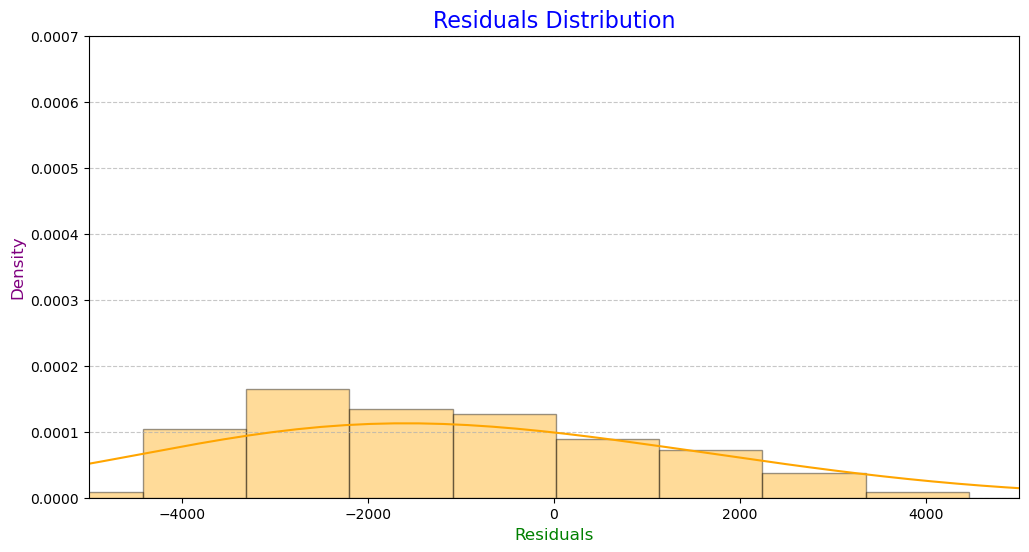

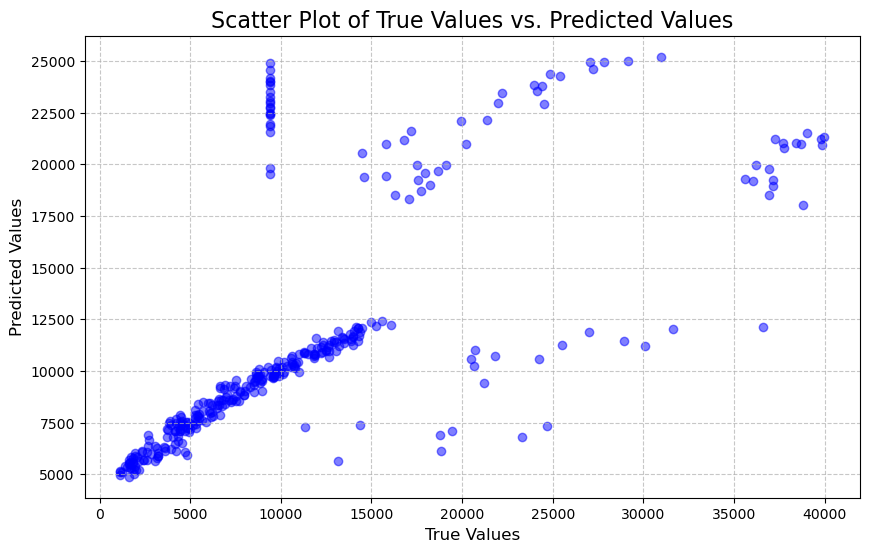

In [124]:
evaluate_model_regression(LinearRegression(), 'Linear Regression', X_train1, y_train1, X_test1, y_test1)

In [125]:
# 2.SVM Model 

In [126]:
from sklearn.svm import SVR

Training score : -0.0343802149970891
Testing score : -0.04146732123775898
R2 score : -0.04146732123775898
MAE : 6012.2372048400375
MSE : 82014997.08311523
RMSE : 9056.213175666484


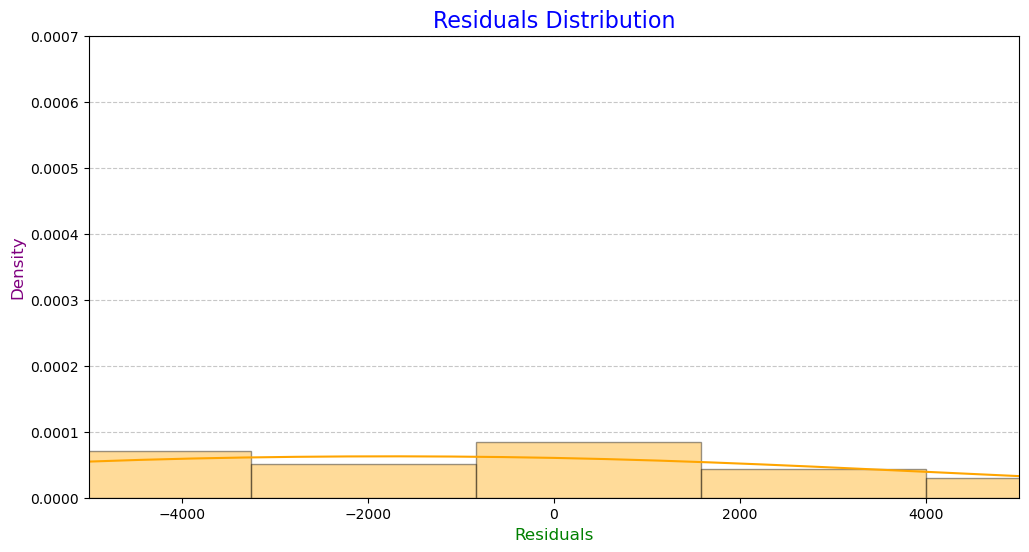

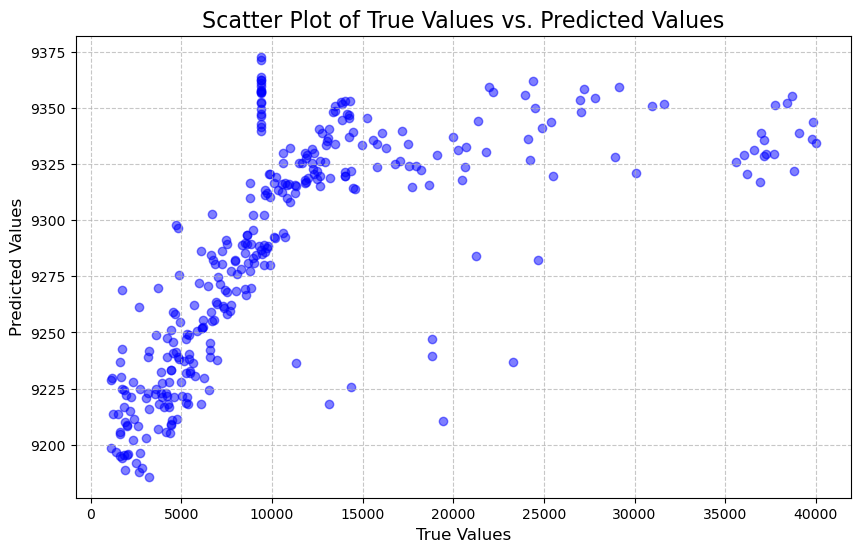

In [127]:
evaluate_model_regression(SVR(), 'SVM', X_train1, y_train1, X_test1, y_test1)

### Model Building For UnScaled Data

In [128]:
def evaluate_model_regression(model, model_name, X_train, y_train, X_test, y_test):
    # Training the model
    model.fit(X_train, y_train)

    # Printing training score
    training_score = model.score(X_train, y_train)
    print(f'Training score : {training_score}')

    # Printing testing score
    testing_score = model.score(X_test, y_test)
    print(f'Testing score : {testing_score}')

    evaluation_results.append({
        "Model": model_name,
        "Training Score": training_score,
        "Testing Score": testing_score,
    })

    # Making predictions on the test set
    y_prediction = model.predict(X_test)

    # Calculating and printing evaluation metrics for regression
    print(f'R2 score : {metrics.r2_score(y_test, y_prediction)}')
    print(f'MAE : {metrics.mean_absolute_error(y_test, y_prediction)}')
    print(f'MSE : {metrics.mean_squared_error(y_test, y_prediction)}')
    print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, y_prediction))}')
    
    # Plotting the distribution of residuals
    plt.figure(figsize=(12, 6))
    sns.distplot(y_test - y_prediction, color='orange', hist_kws=dict(edgecolor="black", linewidth=1))
    plt.title('Residuals Distribution', fontsize=16, color='blue')
    plt.xlabel('Residuals', fontsize=12, color='green')
    plt.ylabel('Density', fontsize=12, color='purple')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-5000, 5000)
    plt.ylim(0, 0.0007)
    plt.show()

    # Scatter plot comparing true values with predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_prediction, color='blue', alpha=0.5)
    plt.title('Scatter Plot of True Values vs. Predicted Values', fontsize=16)
    plt.xlabel('True Values', fontsize=12)
    plt.ylabel('Predicted Values', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

In [129]:
# 3. Decision Tree Regressor

In [130]:
from sklearn.tree import DecisionTreeRegressor

Training score : 1.0
Testing score : 0.40687174668497506
R2 score : 0.40687174668497506
MAE : 3063.207551698508
MSE : 48539540.14199734
RMSE : 6967.032376987876


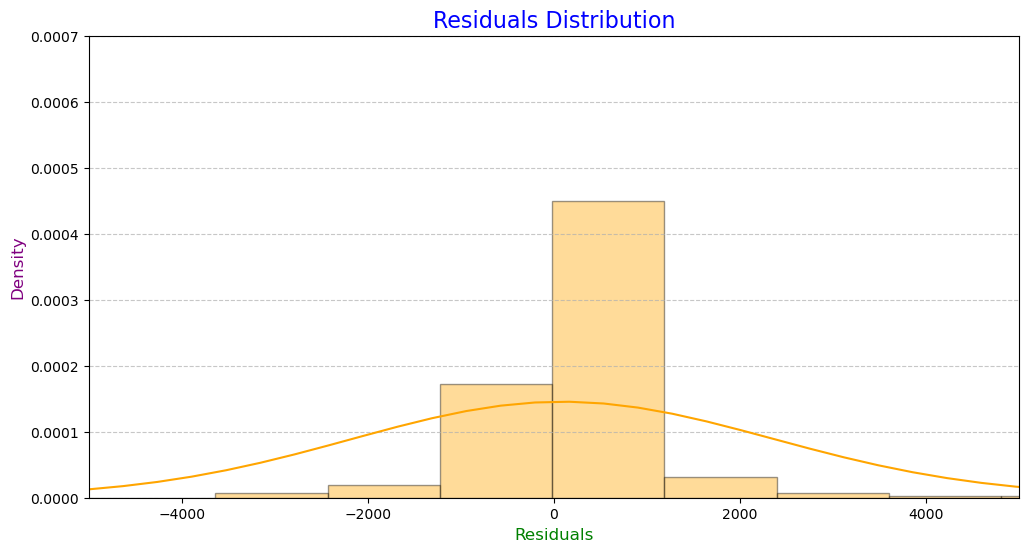

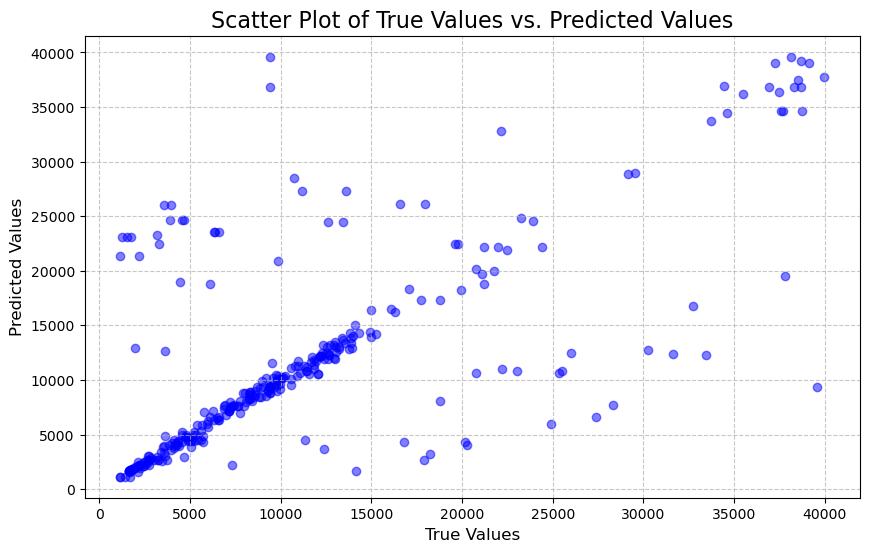

In [131]:
evaluate_model_regression(DecisionTreeRegressor(), 'Decision Tree', X_train, y_train, X_test, y_test)

In [132]:
# 4. Random Forest Regressor Model

In [133]:
from sklearn.ensemble import RandomForestRegressor

Training score : 0.9406537630419939
Testing score : 0.6832836710414123
R2 score : 0.6832836710414123
MAE : 2852.127837043583
MSE : 25918955.769160233
RMSE : 5091.066270356361


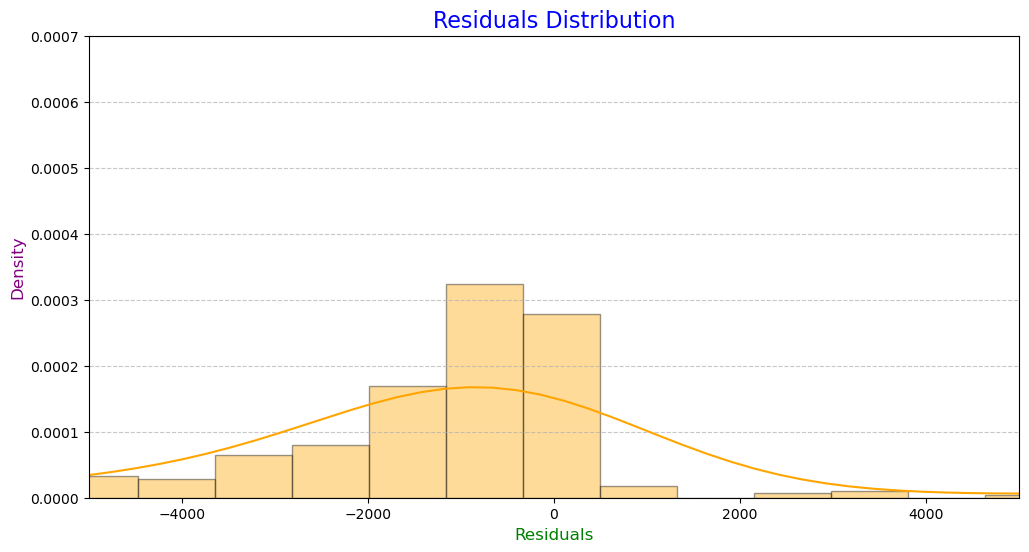

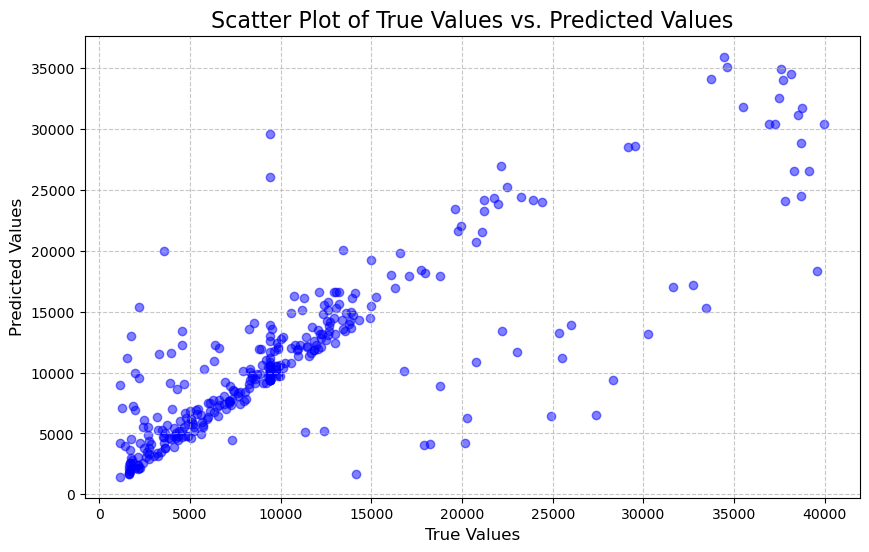

In [134]:
evaluate_model_regression(RandomForestRegressor(), 'Random Forest', X_train, y_train, X_test, y_test)

In [135]:
# 5. XG Boost Regressor Model

In [136]:
from xgboost import XGBRegressor

Training score : 0.9906870390056599
Testing score : 0.6198609263411528
R2 score : 0.6198609263411528
MAE : 3240.0349948054622
MSE : 31109251.198669683
RMSE : 5577.566781193183


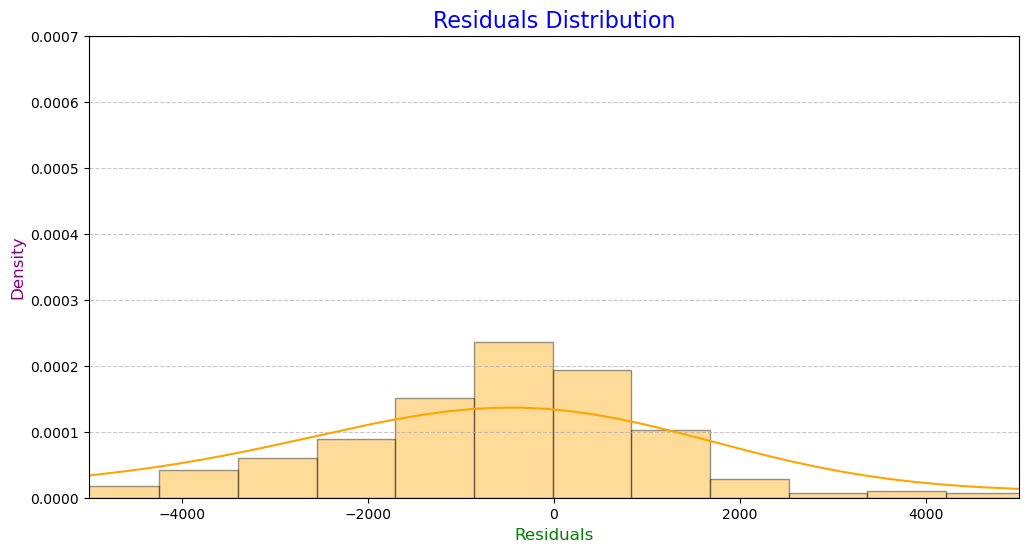

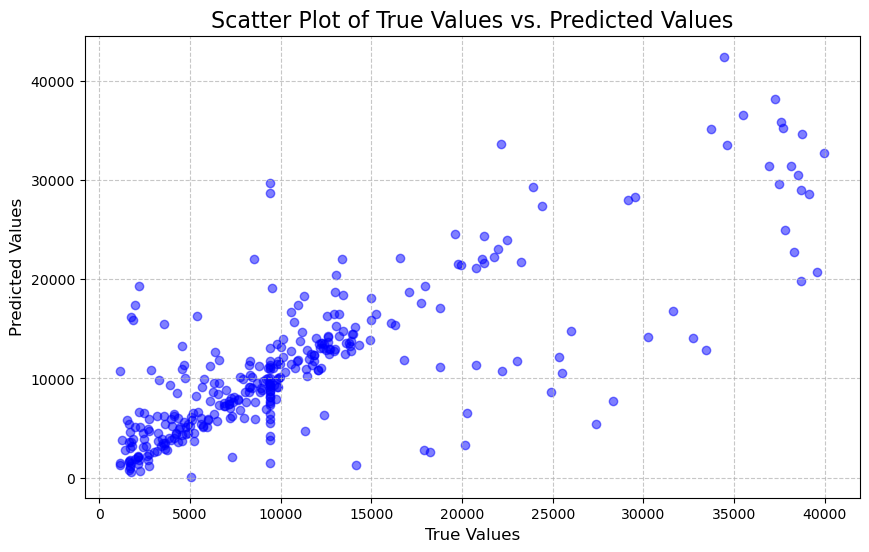

In [137]:
evaluate_model_regression(XGBRegressor(), 'XG Boost', X_train, y_train, X_test, y_test)

In [138]:
# 6. CatBoost Regressor Model

In [139]:
from catboost import CatBoostRegressor

Learning rate set to 0.040956
0:	learn: 8684.0071552	total: 109ms	remaining: 1m 48s
1:	learn: 8504.8823588	total: 113ms	remaining: 56.5s
2:	learn: 8318.6480341	total: 116ms	remaining: 38.7s
3:	learn: 8149.9682416	total: 120ms	remaining: 29.8s
4:	learn: 7987.3754181	total: 122ms	remaining: 24.4s
5:	learn: 7832.9709012	total: 126ms	remaining: 20.9s
6:	learn: 7681.6162249	total: 129ms	remaining: 18.3s
7:	learn: 7539.7503017	total: 131ms	remaining: 16.3s
8:	learn: 7402.0141123	total: 133ms	remaining: 14.7s
9:	learn: 7276.5201462	total: 136ms	remaining: 13.5s
10:	learn: 7157.6038322	total: 139ms	remaining: 12.5s
11:	learn: 7038.7322330	total: 141ms	remaining: 11.6s
12:	learn: 6926.3281261	total: 144ms	remaining: 10.9s
13:	learn: 6838.8326863	total: 146ms	remaining: 10.3s
14:	learn: 6739.7104451	total: 149ms	remaining: 9.77s
15:	learn: 6646.9305178	total: 151ms	remaining: 9.31s
16:	learn: 6571.3552081	total: 154ms	remaining: 8.93s
17:	learn: 6488.1347666	total: 159ms	remaining: 8.65s
18:	lea

166:	learn: 4497.9453446	total: 539ms	remaining: 2.69s
167:	learn: 4493.0475143	total: 543ms	remaining: 2.69s
168:	learn: 4492.7476503	total: 544ms	remaining: 2.67s
169:	learn: 4486.9835044	total: 547ms	remaining: 2.67s
170:	learn: 4479.8233664	total: 549ms	remaining: 2.66s
171:	learn: 4479.4962802	total: 550ms	remaining: 2.65s
172:	learn: 4475.3981098	total: 554ms	remaining: 2.65s
173:	learn: 4471.8243998	total: 556ms	remaining: 2.64s
174:	learn: 4465.9880639	total: 559ms	remaining: 2.64s
175:	learn: 4464.3467836	total: 562ms	remaining: 2.63s
176:	learn: 4459.8295605	total: 564ms	remaining: 2.62s
177:	learn: 4456.3800902	total: 567ms	remaining: 2.62s
178:	learn: 4454.4664367	total: 569ms	remaining: 2.61s
179:	learn: 4450.7489837	total: 572ms	remaining: 2.6s
180:	learn: 4446.5944882	total: 574ms	remaining: 2.6s
181:	learn: 4442.5014041	total: 576ms	remaining: 2.59s
182:	learn: 4439.0969544	total: 578ms	remaining: 2.58s
183:	learn: 4435.2991194	total: 581ms	remaining: 2.58s
184:	learn: 

344:	learn: 4005.1638493	total: 912ms	remaining: 1.73s
345:	learn: 4004.0262237	total: 915ms	remaining: 1.73s
346:	learn: 4002.6570166	total: 917ms	remaining: 1.73s
347:	learn: 3998.1330659	total: 920ms	remaining: 1.72s
348:	learn: 3997.1961428	total: 922ms	remaining: 1.72s
349:	learn: 3996.5567765	total: 924ms	remaining: 1.72s
350:	learn: 3992.7995809	total: 926ms	remaining: 1.71s
351:	learn: 3990.0613371	total: 929ms	remaining: 1.71s
352:	learn: 3988.1899512	total: 932ms	remaining: 1.71s
353:	learn: 3985.9599154	total: 934ms	remaining: 1.7s
354:	learn: 3984.5606402	total: 936ms	remaining: 1.7s
355:	learn: 3982.8069901	total: 939ms	remaining: 1.7s
356:	learn: 3979.1518949	total: 941ms	remaining: 1.69s
357:	learn: 3973.7395989	total: 943ms	remaining: 1.69s
358:	learn: 3971.2231037	total: 945ms	remaining: 1.69s
359:	learn: 3969.6507861	total: 948ms	remaining: 1.68s
360:	learn: 3966.3149297	total: 950ms	remaining: 1.68s
361:	learn: 3963.1857657	total: 953ms	remaining: 1.68s
362:	learn: 3

535:	learn: 3600.7760580	total: 1.29s	remaining: 1.12s
536:	learn: 3600.1734551	total: 1.29s	remaining: 1.11s
537:	learn: 3599.2563419	total: 1.29s	remaining: 1.11s
538:	learn: 3598.0688166	total: 1.3s	remaining: 1.11s
539:	learn: 3594.1040645	total: 1.3s	remaining: 1.11s
540:	learn: 3590.7221880	total: 1.3s	remaining: 1.1s
541:	learn: 3589.2086970	total: 1.3s	remaining: 1.1s
542:	learn: 3588.3995584	total: 1.3s	remaining: 1.1s
543:	learn: 3586.9701552	total: 1.31s	remaining: 1.09s
544:	learn: 3583.7498639	total: 1.31s	remaining: 1.09s
545:	learn: 3580.1050390	total: 1.31s	remaining: 1.09s
546:	learn: 3579.1718177	total: 1.31s	remaining: 1.09s
547:	learn: 3575.6906880	total: 1.31s	remaining: 1.08s
548:	learn: 3574.2555150	total: 1.31s	remaining: 1.08s
549:	learn: 3573.1095837	total: 1.32s	remaining: 1.08s
550:	learn: 3570.2497126	total: 1.32s	remaining: 1.07s
551:	learn: 3567.8488536	total: 1.32s	remaining: 1.07s
552:	learn: 3566.6421644	total: 1.32s	remaining: 1.07s
553:	learn: 3564.7

741:	learn: 3232.3250583	total: 1.68s	remaining: 583ms
742:	learn: 3230.4201972	total: 1.68s	remaining: 581ms
743:	learn: 3228.0566690	total: 1.68s	remaining: 579ms
744:	learn: 3227.0939186	total: 1.68s	remaining: 576ms
745:	learn: 3226.2944996	total: 1.69s	remaining: 574ms
746:	learn: 3225.0637702	total: 1.69s	remaining: 572ms
747:	learn: 3223.0447044	total: 1.69s	remaining: 569ms
748:	learn: 3221.5270119	total: 1.69s	remaining: 567ms
749:	learn: 3220.8103308	total: 1.69s	remaining: 565ms
750:	learn: 3218.9917999	total: 1.7s	remaining: 562ms
751:	learn: 3218.3863392	total: 1.7s	remaining: 560ms
752:	learn: 3215.0246455	total: 1.7s	remaining: 558ms
753:	learn: 3214.3516755	total: 1.7s	remaining: 555ms
754:	learn: 3213.5542267	total: 1.7s	remaining: 553ms
755:	learn: 3211.2586518	total: 1.71s	remaining: 551ms
756:	learn: 3210.0691627	total: 1.71s	remaining: 548ms
757:	learn: 3207.9533601	total: 1.71s	remaining: 546ms
758:	learn: 3206.1072224	total: 1.71s	remaining: 544ms
759:	learn: 320

927:	learn: 2955.5645064	total: 2.07s	remaining: 161ms
928:	learn: 2953.7775612	total: 2.07s	remaining: 158ms
929:	learn: 2951.7661986	total: 2.07s	remaining: 156ms
930:	learn: 2951.0872805	total: 2.08s	remaining: 154ms
931:	learn: 2948.5487850	total: 2.08s	remaining: 152ms
932:	learn: 2945.9401205	total: 2.08s	remaining: 149ms
933:	learn: 2943.1825009	total: 2.08s	remaining: 147ms
934:	learn: 2941.2704133	total: 2.08s	remaining: 145ms
935:	learn: 2939.8122970	total: 2.09s	remaining: 143ms
936:	learn: 2938.4046618	total: 2.09s	remaining: 140ms
937:	learn: 2937.2292326	total: 2.09s	remaining: 138ms
938:	learn: 2935.1736858	total: 2.09s	remaining: 136ms
939:	learn: 2933.7927694	total: 2.1s	remaining: 134ms
940:	learn: 2931.3469467	total: 2.1s	remaining: 132ms
941:	learn: 2930.2331001	total: 2.1s	remaining: 129ms
942:	learn: 2928.9208204	total: 2.1s	remaining: 127ms
943:	learn: 2926.8501340	total: 2.1s	remaining: 125ms
944:	learn: 2926.2402153	total: 2.11s	remaining: 123ms
945:	learn: 292

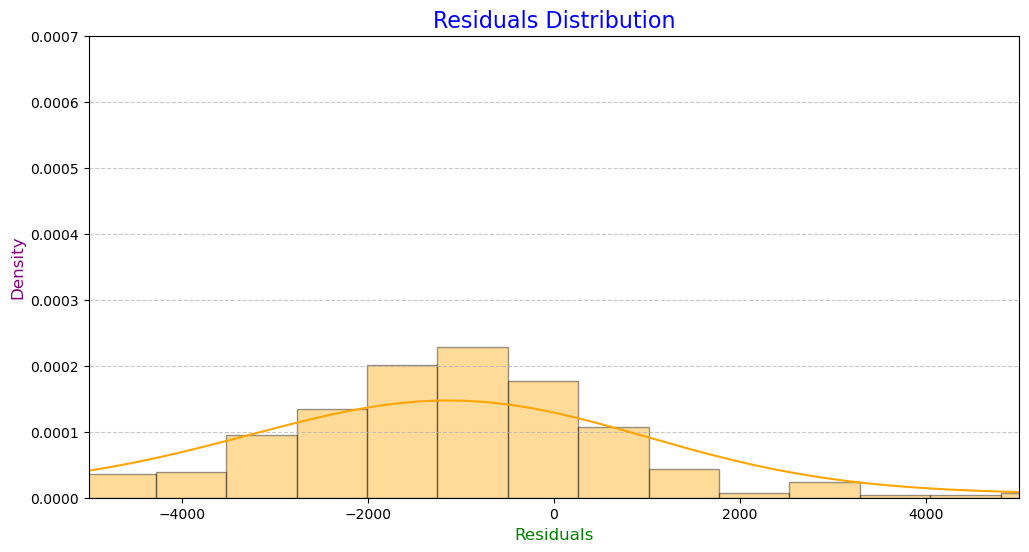

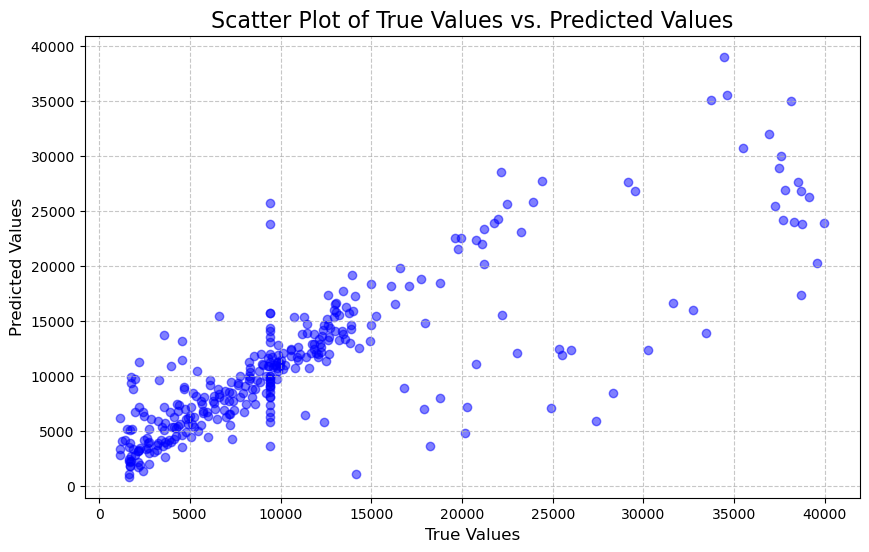

In [140]:
evaluate_model_regression(CatBoostRegressor(), 'Cat Boost', X_train, y_train, X_test, y_test)

In [141]:
# 7. LGBM Model

In [142]:
from lightgbm import LGBMRegressor

Training score : 0.8632170342418365
Testing score : 0.6567595208512926
R2 score : 0.6567595208512926
MAE : 3317.6431498748707
MSE : 28089599.37902023
RMSE : 5299.9622054331885


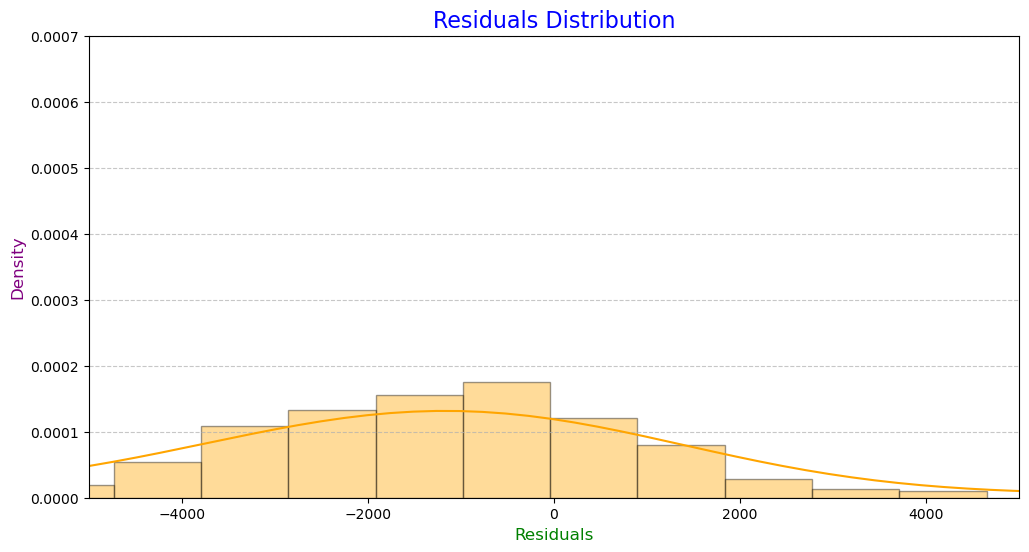

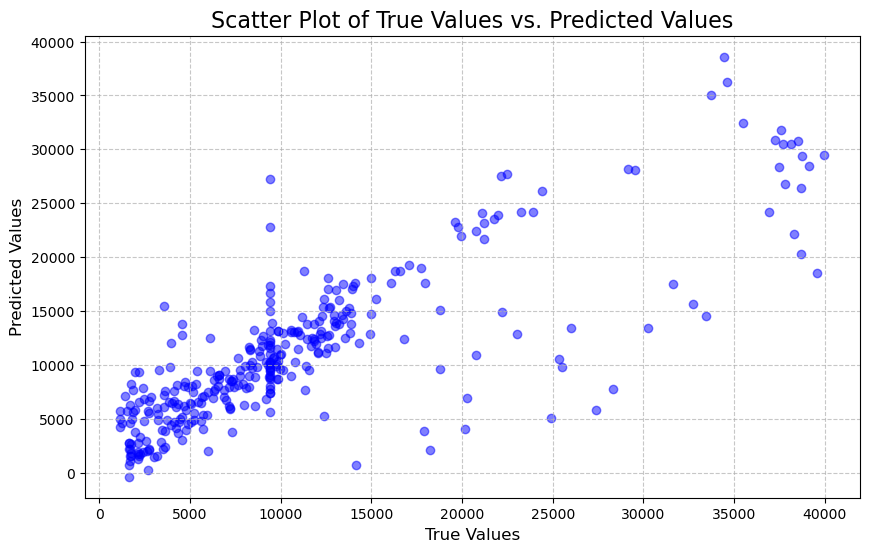

In [143]:
evaluate_model_regression(LGBMRegressor(), 'LGBM', X_train, y_train, X_test, y_test)

### All Model Performance Comparison

In [144]:
df_results = pd.DataFrame(evaluation_results)

In [145]:
df_results

,Model,Training Score,Testing Score
0,Linear Regression,0.409105,0.451705
1,SVM,-0.034380,-0.041467
2,Decision Tree,1.000000,0.406872
3,Random Forest,0.940654,0.683284
4,XG Boost,0.990687,0.619861
5,Cat Boost,0.897135,0.658530
6,LGBM,0.863217,0.656760


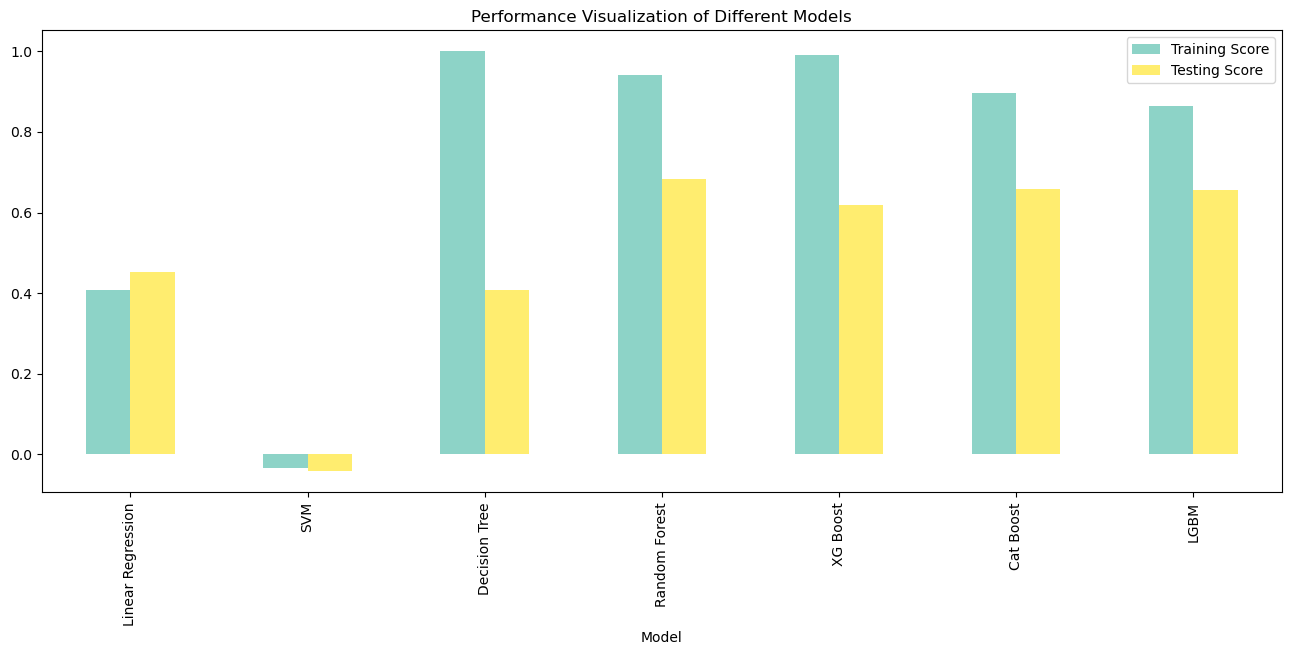

In [146]:
df_results.plot(x="Model",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set3")
plt.show()

### Hyper-Parameter Tunning of LGBM Model

In [147]:
model1 = LGBMRegressor()

In [148]:
parameters1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}     

In [149]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [150]:
grid_search1 = GridSearchCV(model1, parameters1, cv=5, n_jobs=-1)

In [151]:
grid_search1.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [152]:
grid_search1.best_score_

0.5995787688803127

In [153]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.03,
 'n_estimators': 100,
 'num_leaves': 16,
 'random_state': 0}

In [154]:
# Creating LGBM Model Using Best Parameters.

In [155]:
model1 = LGBMRegressor(**best_parameters1)

In [156]:
model1.fit(X_train,y_train)

LGBMRegressor(learning_rate=0.03, num_leaves=16, random_state=0)

In [157]:
X_test_pred1 = model1.predict(X_test)

In [158]:
metrics.r2_score(y_test, X_test_pred1)

0.6850267810678898

### Hyper-Parameter Tunning of CatBoost Model

In [159]:
model2 = CatBoostRegressor(verbose=False)

In [160]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [161]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [162]:
grid_search2.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000277E98F97E0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [163]:
grid_search2.best_score_

0.6018332313263555

In [164]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 40, 'learning_rate': 0.1, 'random_state': 0}

In [165]:
# Creating Cat Boost Model Using Best Parameters

In [166]:
model2 = CatBoostRegressor(**best_parameters2,verbose=False)

In [167]:
model2.fit(X_train,y_train)

In [168]:
X_test_pred2 = model2.predict(X_test)

In [169]:
metrics.r2_score(y_test, X_test_pred2)

0.6722688749967858

### Hyper-Parameter Tunning of XGBoost Model

In [170]:
model3 = XGBRegressor()

In [171]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [172]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [173]:
grid_search3.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [174]:
grid_search3.best_score_

0.5564144266367951

In [175]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.1, 'n_estimators': 50, 'random_state': 0}

In [176]:
# Creating XGBoost Model Using Best Parameters

In [177]:
model3 = XGBRegressor(**best_parameters3)

In [178]:
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [179]:
X_test_pred3 = model3.predict(X_test)

In [180]:
metrics.r2_score(y_test, X_test_pred3)

0.6869976857863548

### Hyper Parameter Tunning of RandomForest Model

In [181]:
model4 = RandomForestRegressor()

In [182]:
parameters4 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [183]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [184]:
grid_search4.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [185]:
grid_search4.best_score_

0.6129605491309341

In [186]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 11,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'n_estimators': 300}

In [187]:
# Creating Random Forest Model Using Best Parameters

In [188]:
model4 = RandomForestRegressor(**best_parameters4)

In [189]:
model4.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=7,
                      n_estimators=300)

In [190]:
X_test_pred4 = model4.predict(X_test)

In [191]:
metrics.r2_score(y_test, X_test_pred4)

0.7002905133991513

### Hyper Parameter Tunning of Decision Tree  Model

In [192]:
model5 = DecisionTreeRegressor()

In [193]:
parameters5 = {
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6],
                'min_impurity_decrease': [0.0, 0.1, 0.2]} 

In [194]:
grid_search5 = GridSearchCV(model5, parameters5, cv=5, n_jobs=-1)

In [195]:
grid_search5.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_impurity_decrease': [0.0, 0.1, 0.2],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9]})

In [196]:
grid_search5.best_score_

0.46502440224503117

In [197]:
best_parameters5 = grid_search4.best_params_
best_parameters5

{'max_depth': 11,
 'min_samples_leaf': 6,
 'min_samples_split': 7,
 'n_estimators': 300}

In [198]:
# Creating Decision Tree Model Using Best Parameters

In [199]:
model5 = RandomForestRegressor(**best_parameters5)

In [200]:
model5.fit(X_train,y_train)

RandomForestRegressor(max_depth=11, min_samples_leaf=6, min_samples_split=7,
                      n_estimators=300)

In [201]:
X_test_pred5 = model5.predict(X_test)

In [202]:
metrics.r2_score(y_test, X_test_pred5)

0.7016581417776075

### Stacking Classifier Model

In [203]:
from sklearn.ensemble import StackingRegressor

In [204]:
stacking_model = StackingRegressor(estimators=[('LGBM', model1), 
                                                ('CAT Boost', model2),
                                                ("XGBoost", model3),
                                                ('RF', model4),
                                                ('DT', model5)])

In [205]:
stacking_model.fit(X_train, y_train)

StackingRegressor(estimators=[('LGBM',
                               LGBMRegressor(learning_rate=0.03, num_leaves=16,
                                             random_state=0)),
                              ('CAT Boost',
                               <catboost.core.CatBoostRegressor object at 0x00000277E98F96F0>),
                              ('XGBoost',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_catego...
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=50, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...)),
                              ('RF',
                               RandomForestRegressor(max_depth=11,
                                                     min_samples_leaf=6,
                                                     min_samples_split=7,
                                                     n_estimators=300)),
                              ('DT',
                               RandomForestRegressor(max_depth=11,
                                                     min_samples_leaf=6,
                                                     min_samples_split=7,
                                                     n_estimators=300))])

In [206]:
X_train_pred5 = stacking_model.predict(X_train)

In [207]:
X_test_pred5 = stacking_model.predict(X_test)

In [208]:
print("Stacking Model R2 Score on Training Data is:", metrics.r2_score(y_train, X_train_pred5)*100)

Stacking Model R2 Score on Training Data is: 75.15609370726828


In [209]:
print("Stacking Model R2 Score on Testing Data is:", metrics.r2_score(y_test, X_test_pred5)*100)

Stacking Model R2 Score on Testing Data is: 70.1785468632032


### Thank You !!

### Please Upvote, Comment and Support !! 😊🚀